# Wavenet Demo
Demo of our efficient generation implementation.

Trains wavenet on a single wav file. Then generates that file, starting from a single sample.

In [1]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model
from wavenet.models import Generator

from IPython.display import Audio

%matplotlib inline

In [2]:
#[inputs, targets, fs] = make_batch('assets/voice.wav')
[inputs, targets, fs] = make_batch('assets/01-aei.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=44100)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


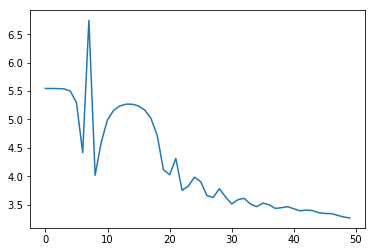

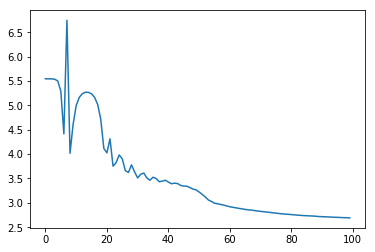

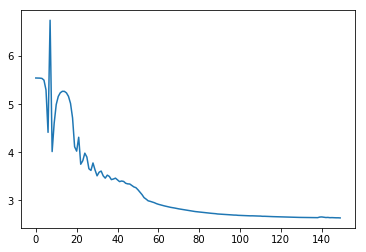

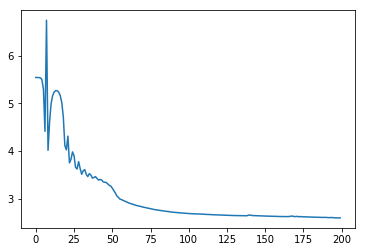

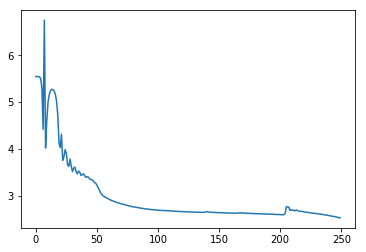

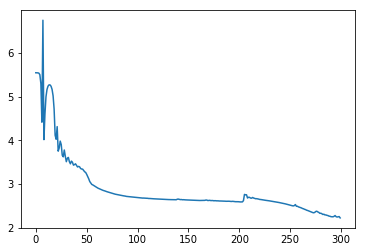

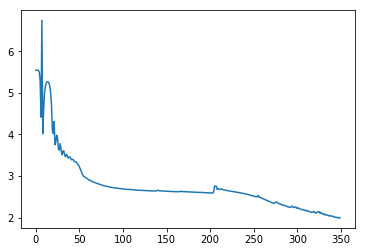

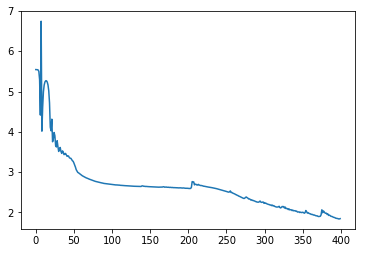

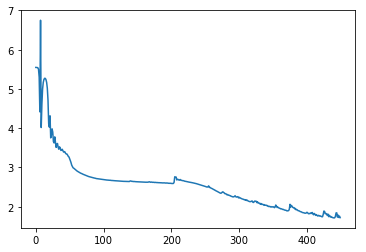

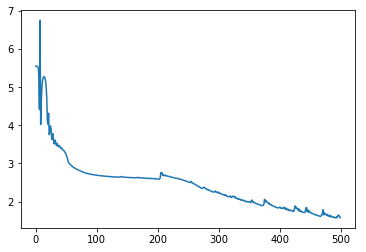

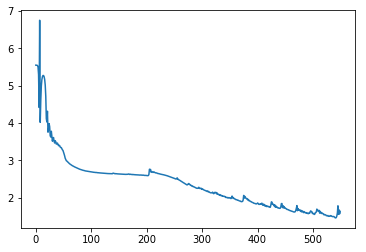

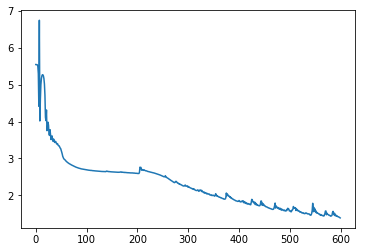

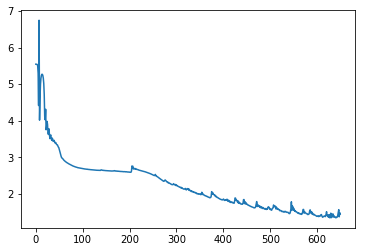

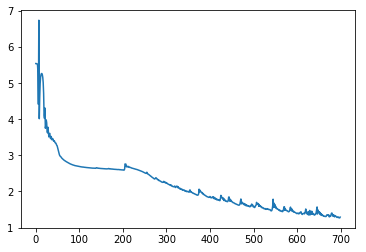

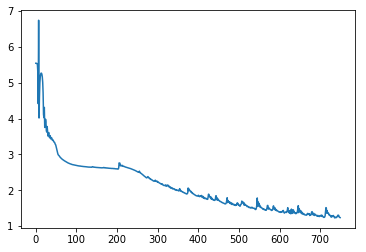

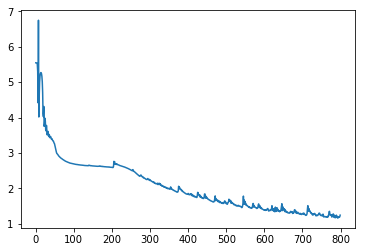

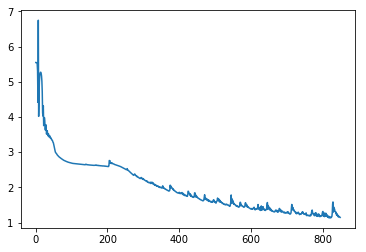

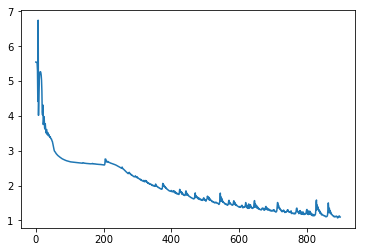

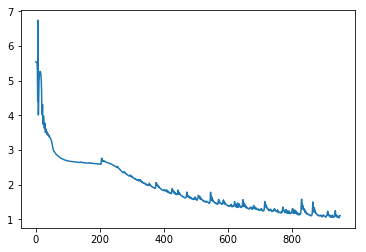

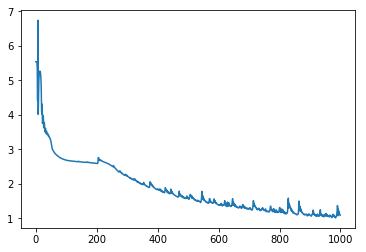

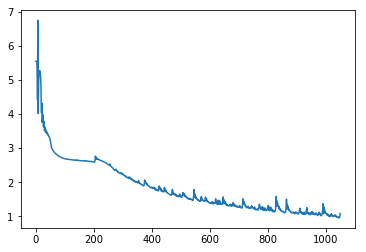

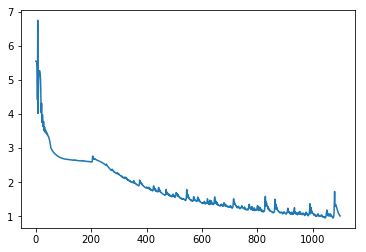

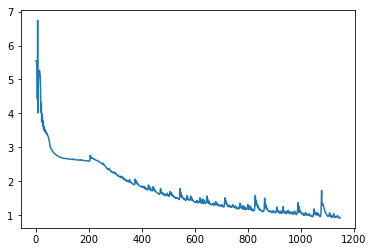

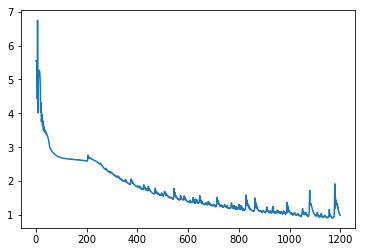

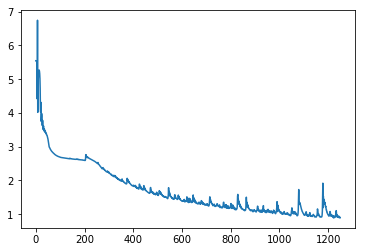

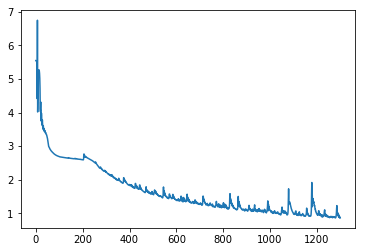

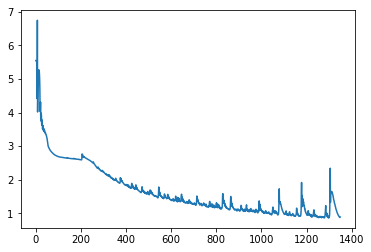

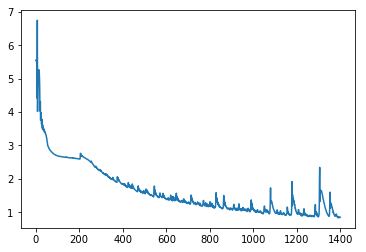

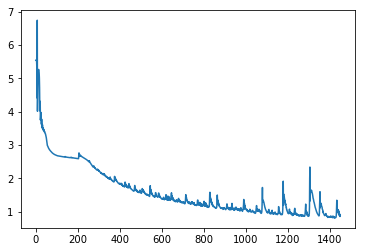

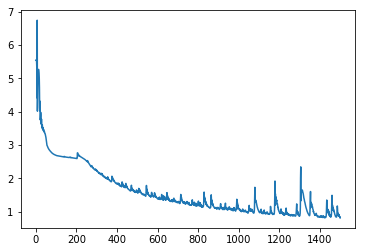

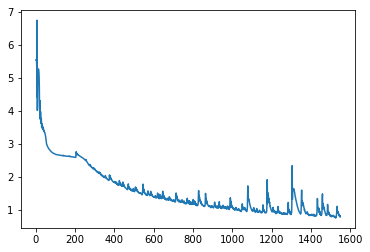

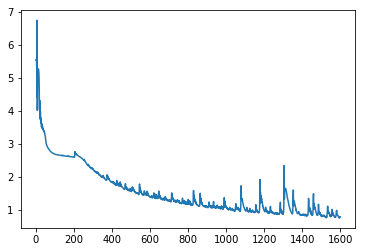

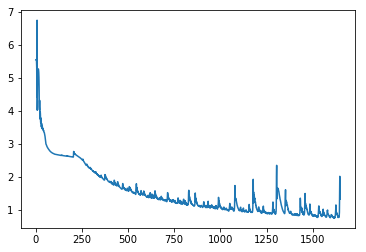

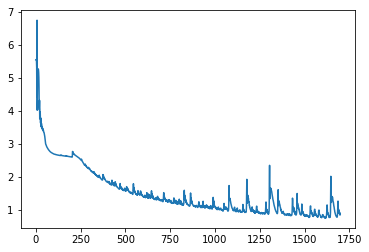

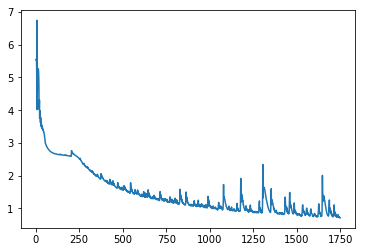

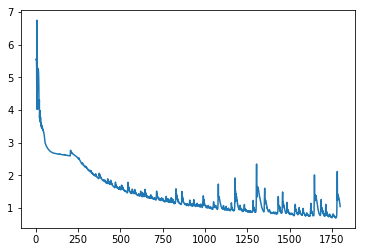

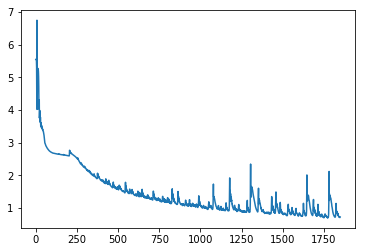

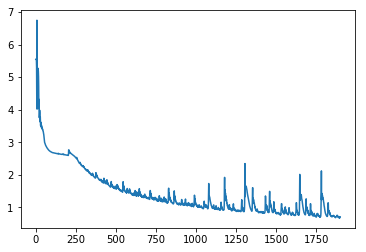

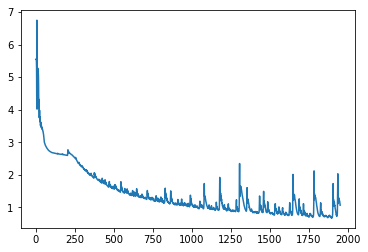

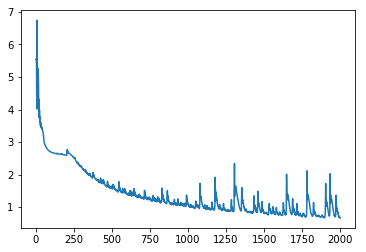

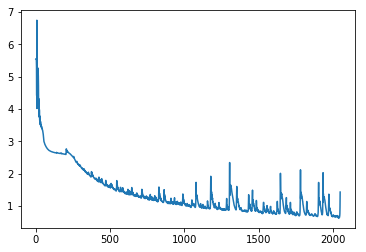

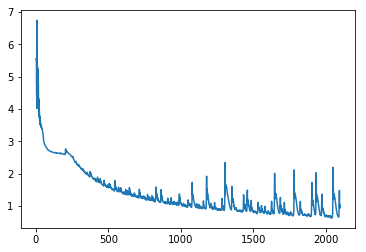

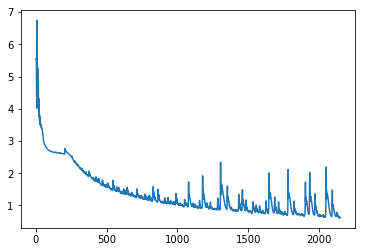

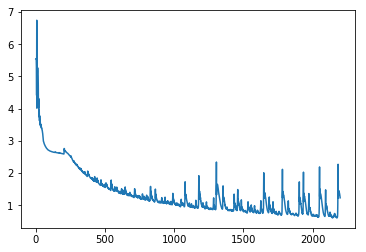

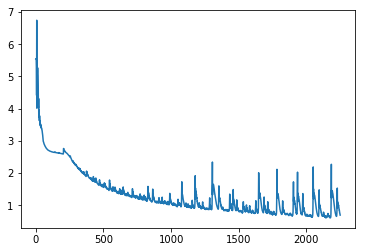

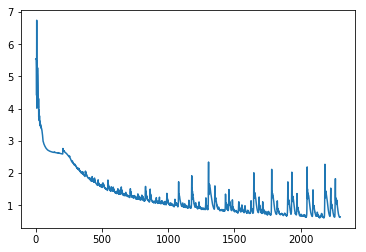

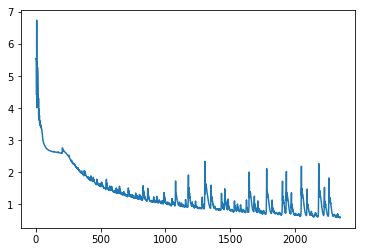

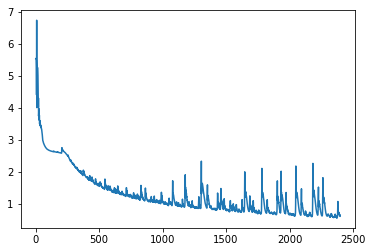

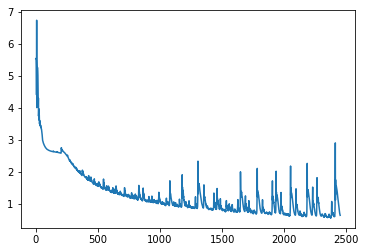

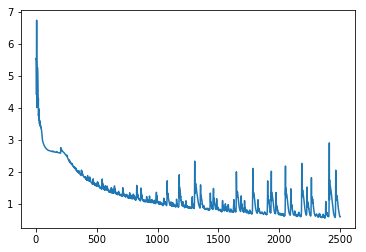

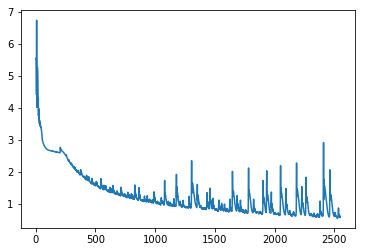

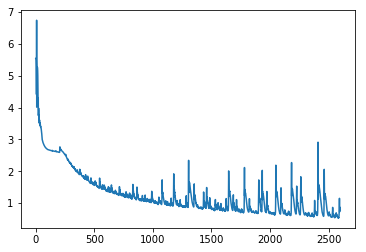

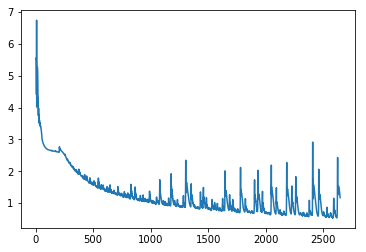

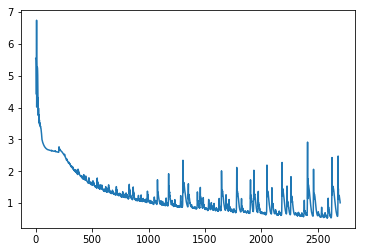

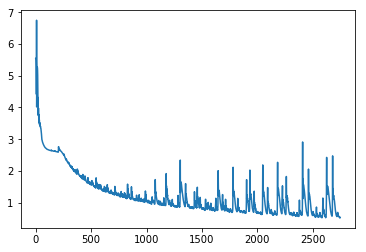

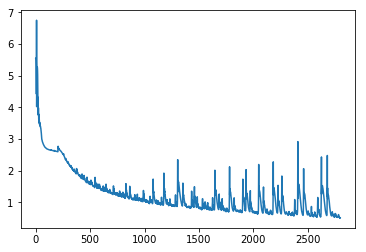

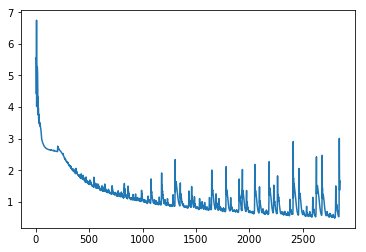

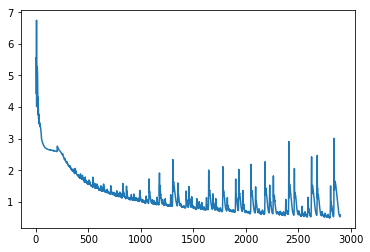

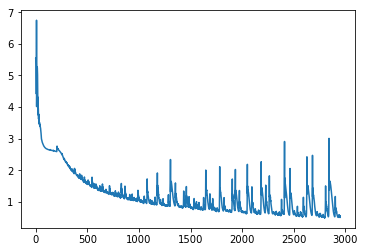

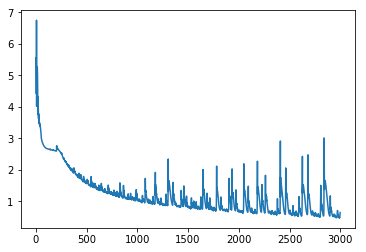

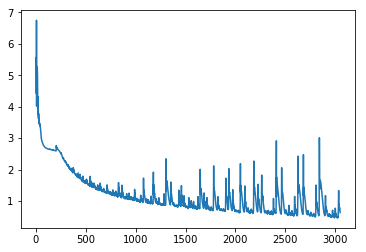

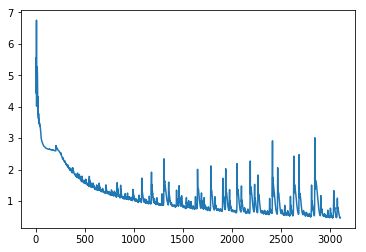

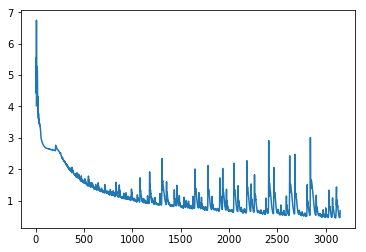

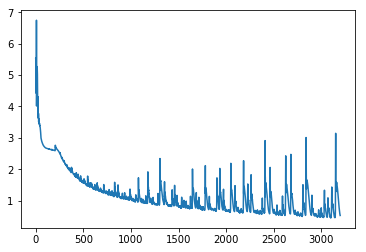

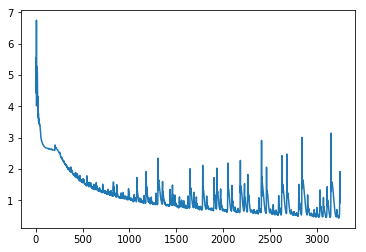

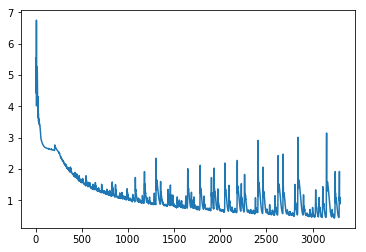

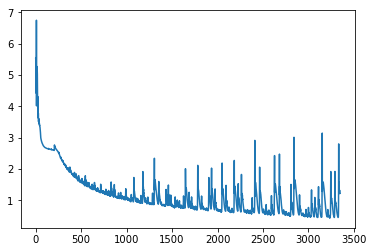

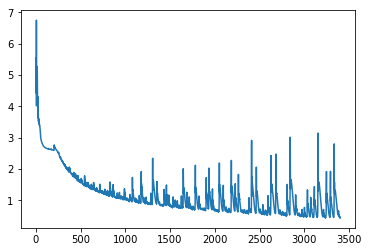

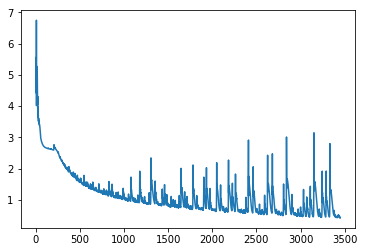

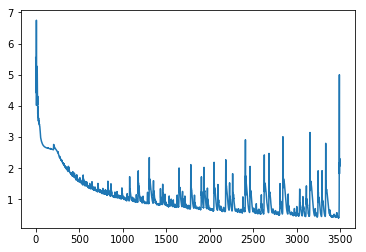

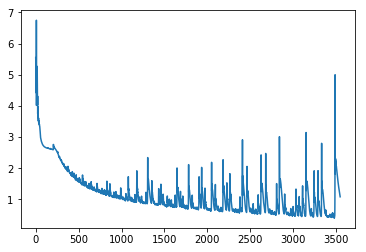

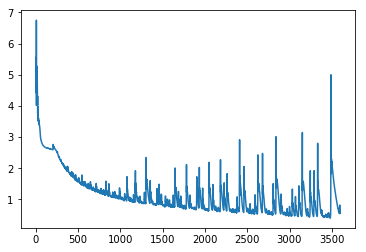

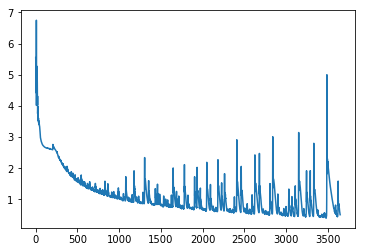

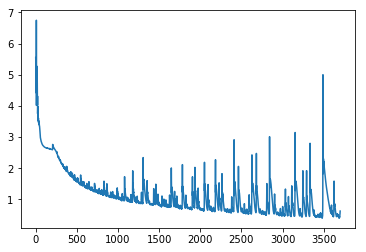

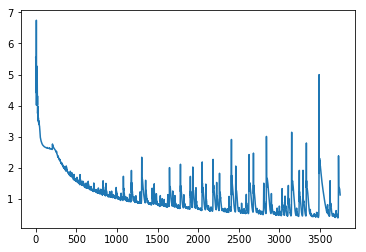

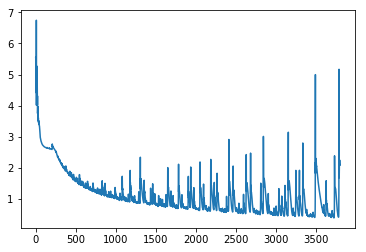

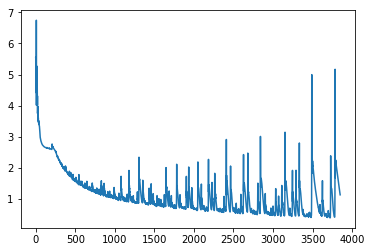

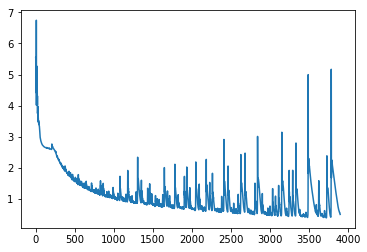

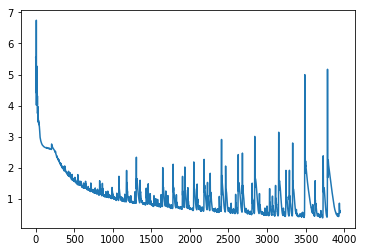

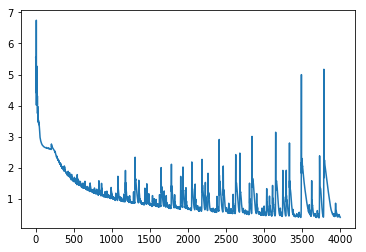

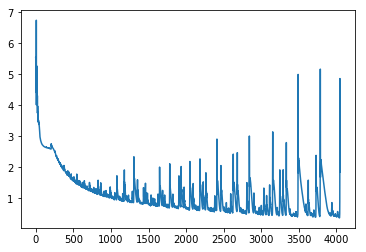

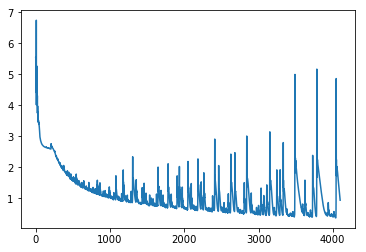

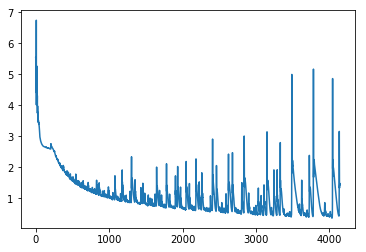

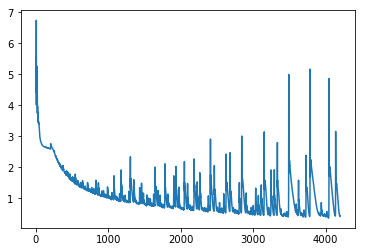

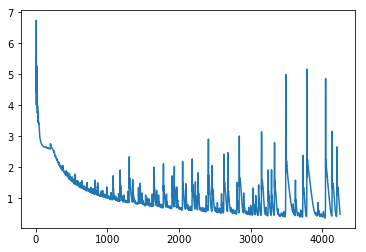

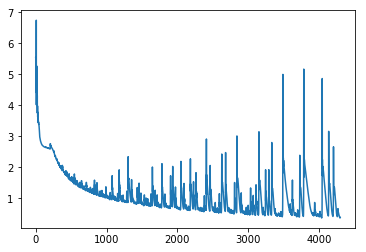

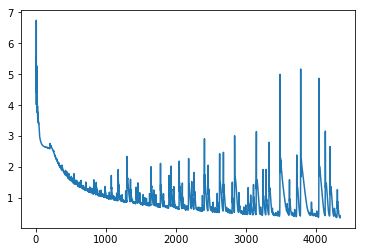

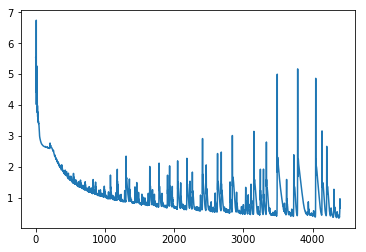

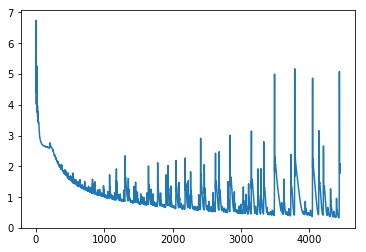

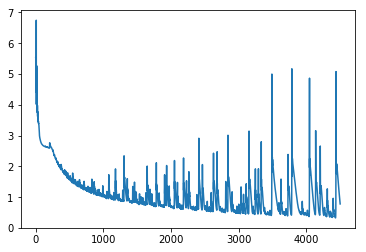

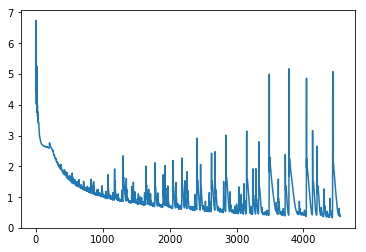

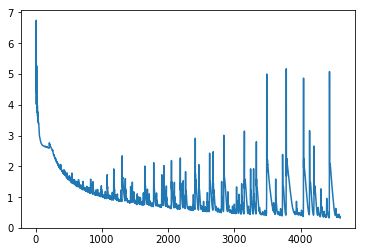

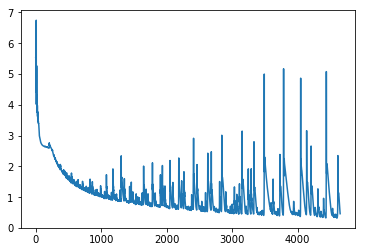

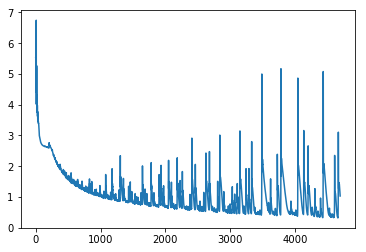

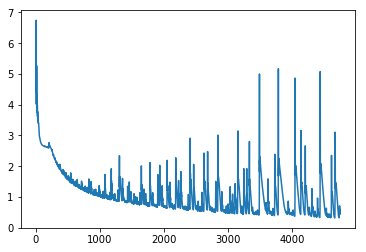

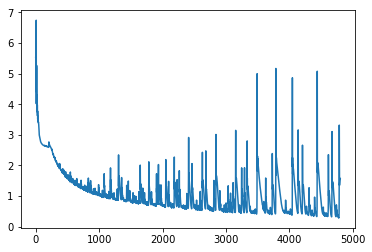

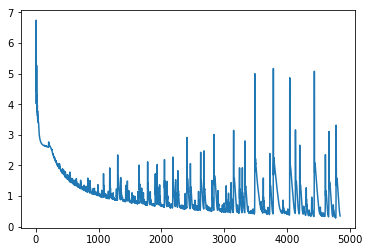

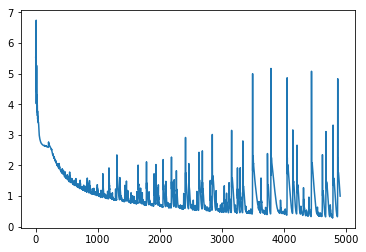

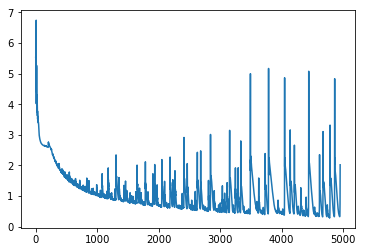

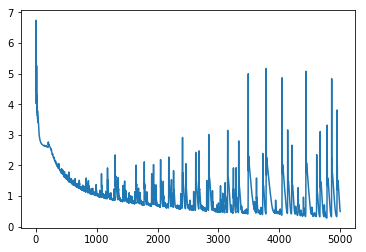

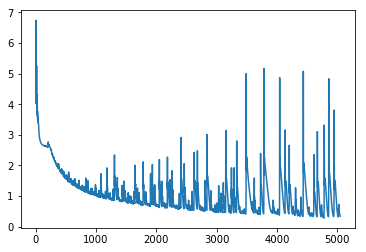

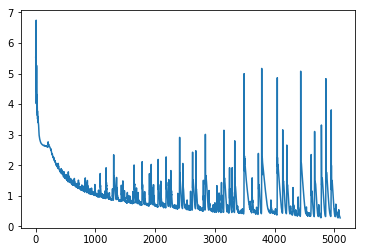

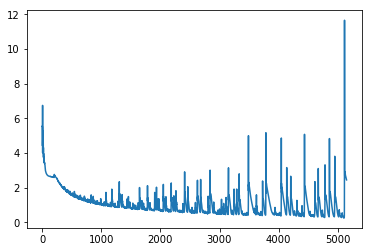

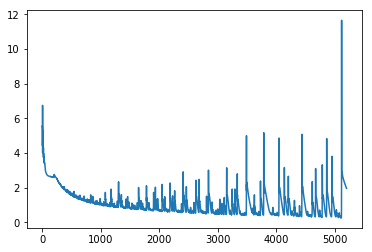

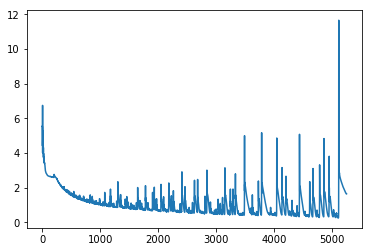

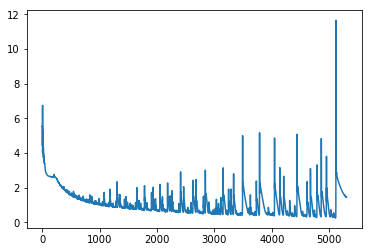

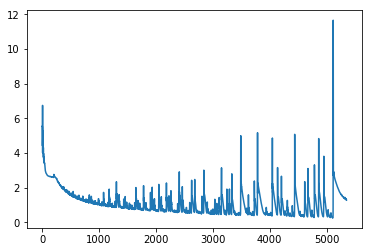

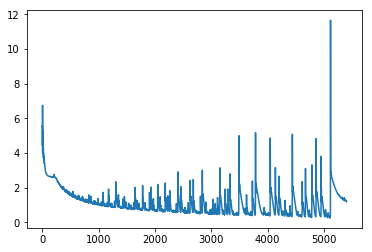

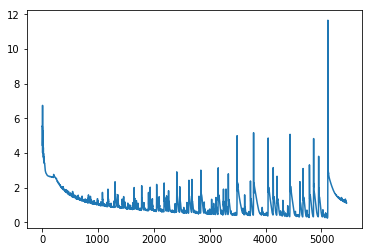

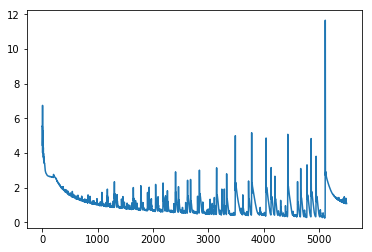

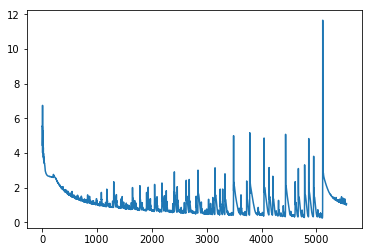

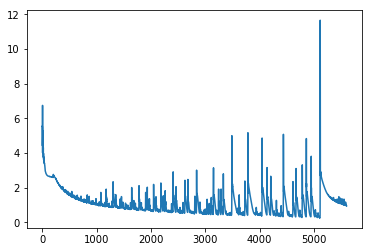

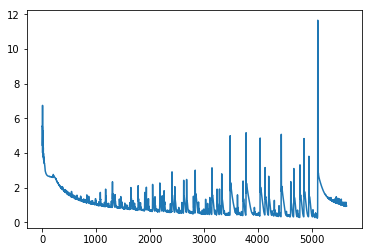

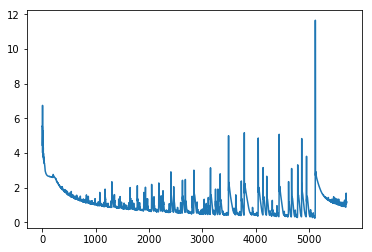

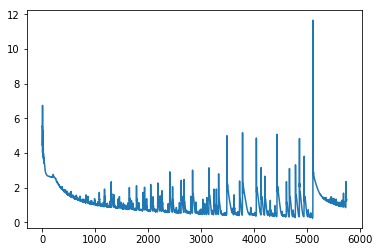

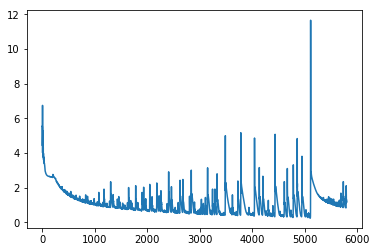

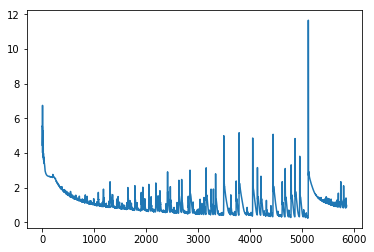

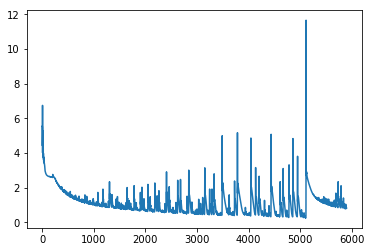

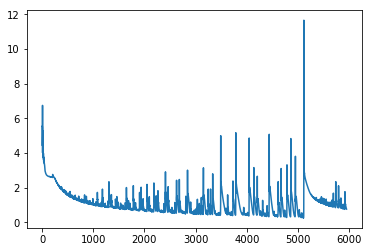

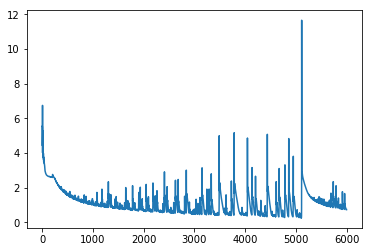

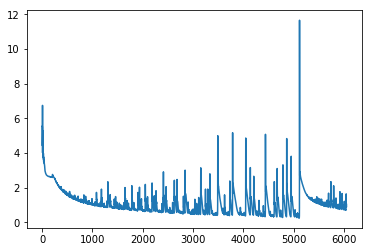

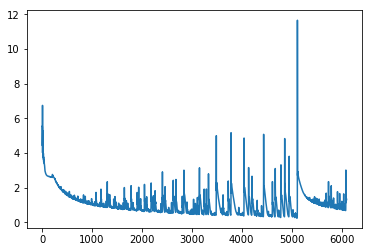

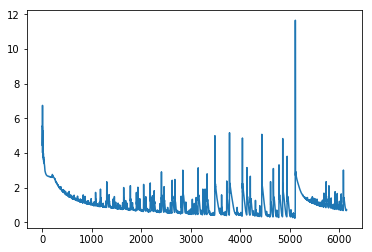

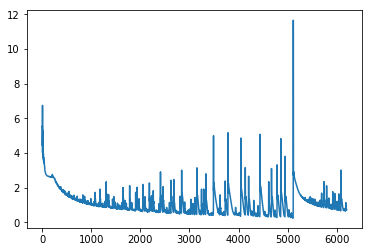

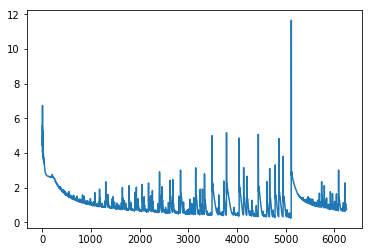

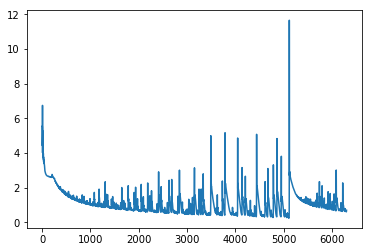

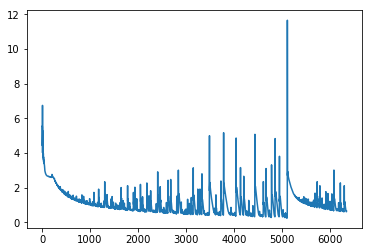

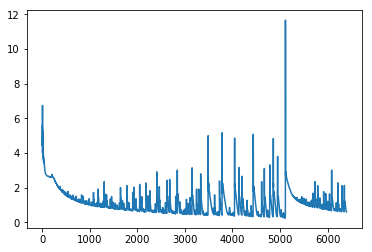

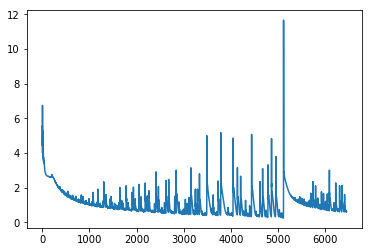

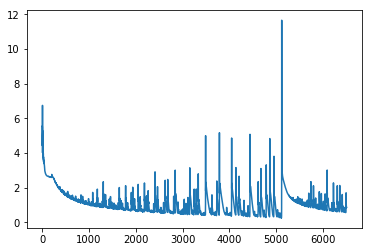

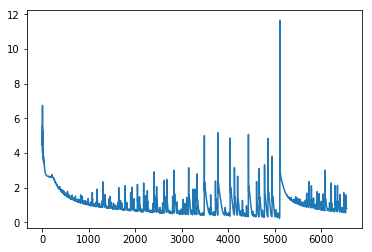

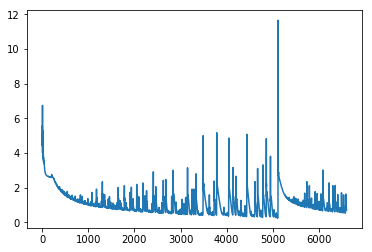

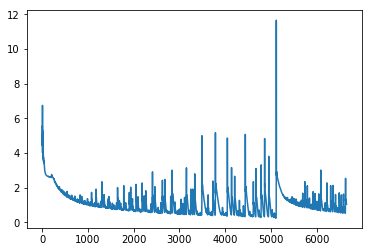

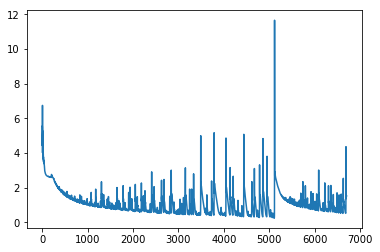

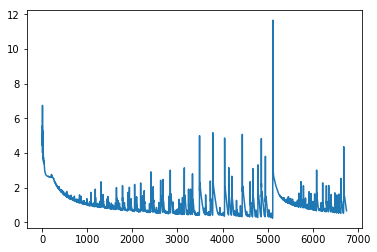

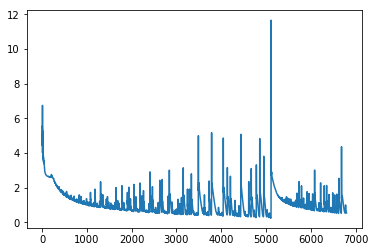

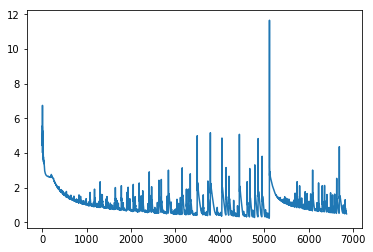

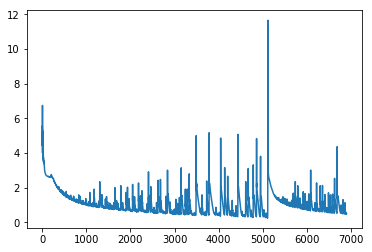

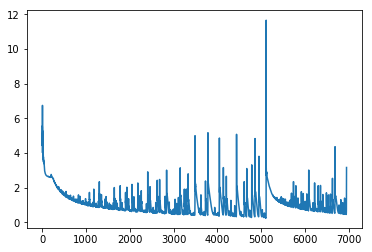

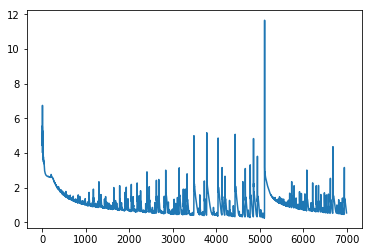

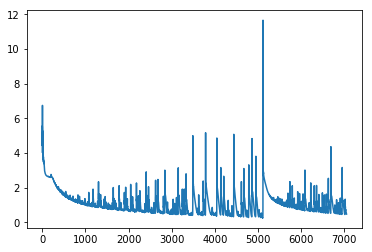

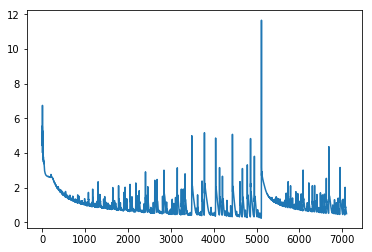

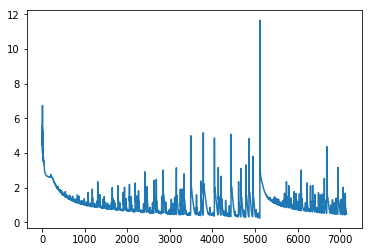

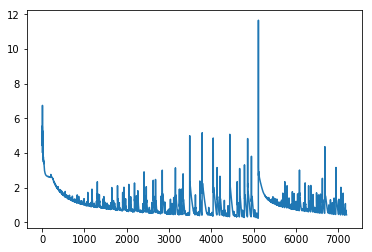

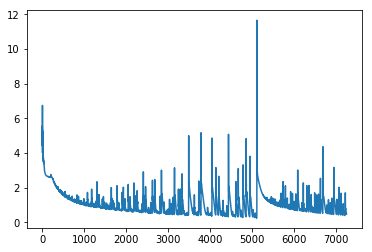

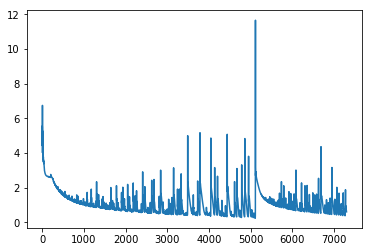

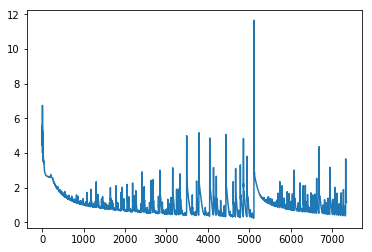

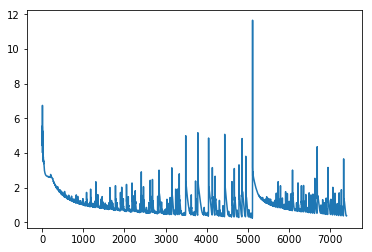

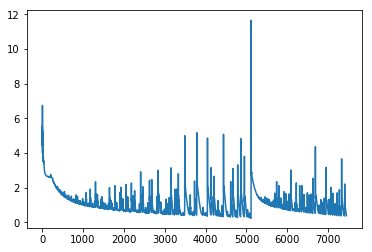

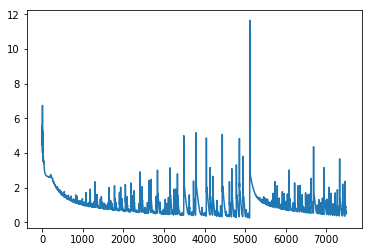

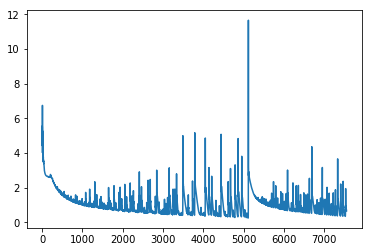

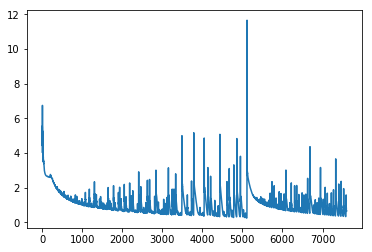

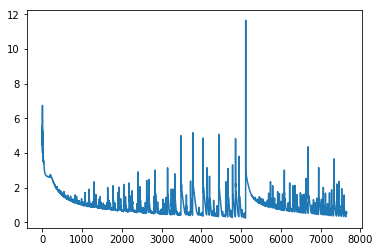

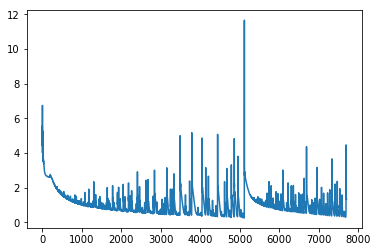

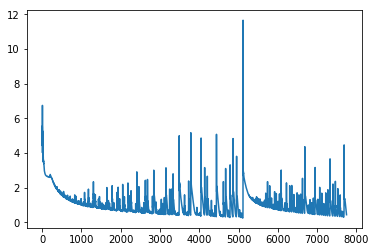

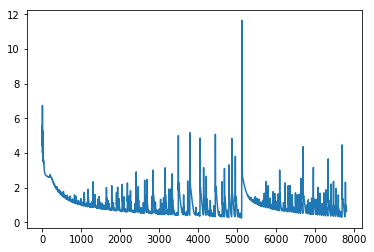

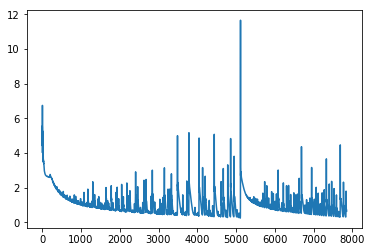

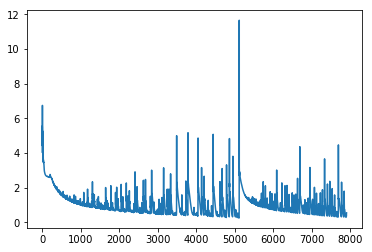

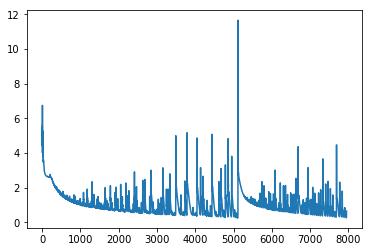

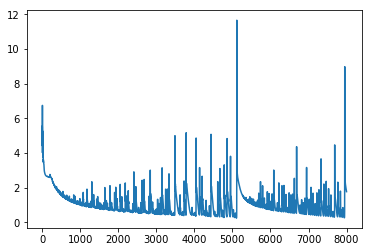

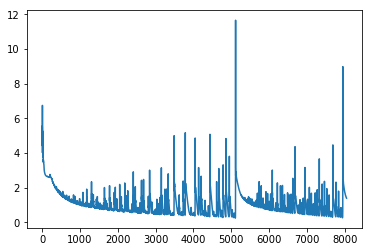

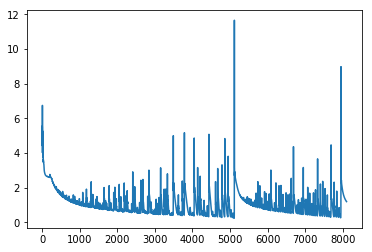

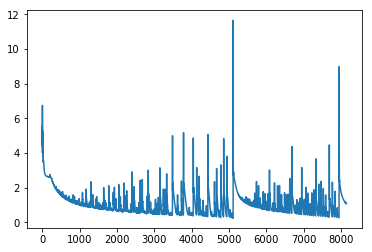

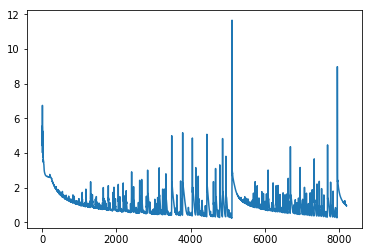

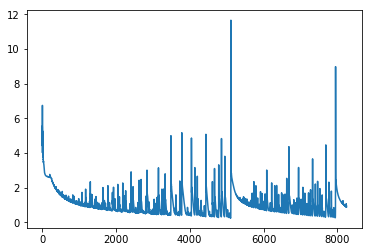

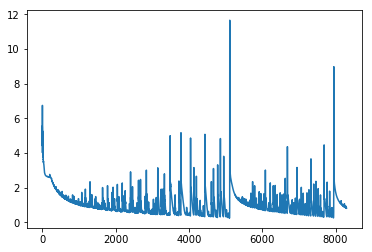

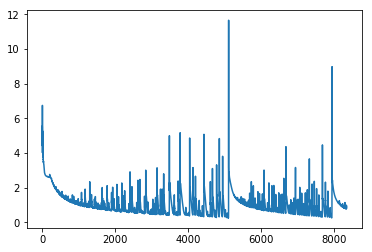

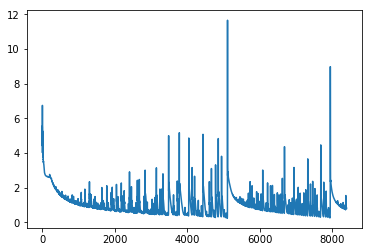

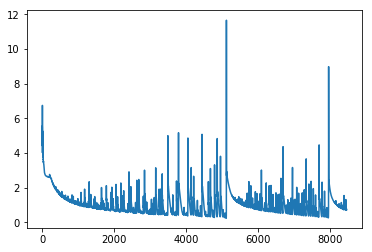

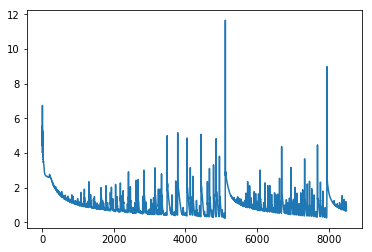

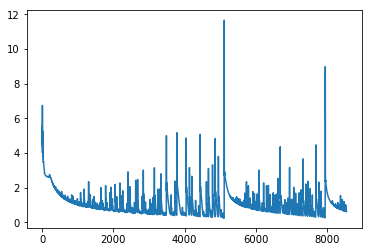

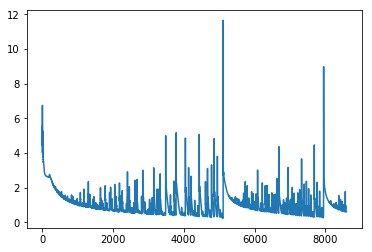

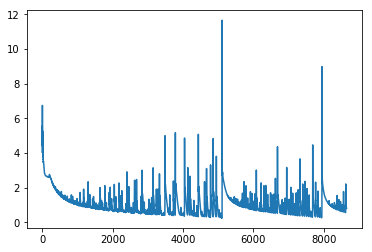

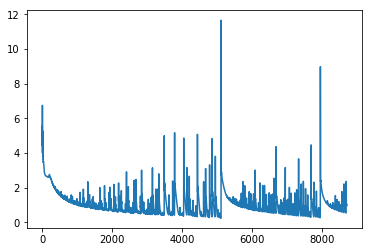

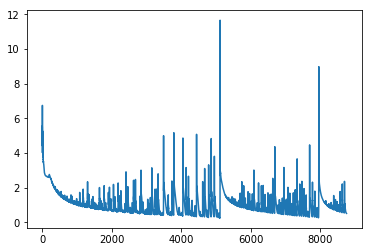

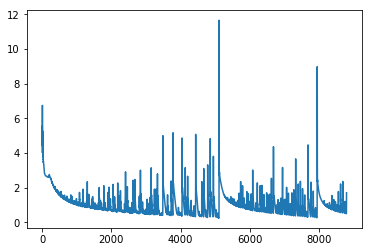

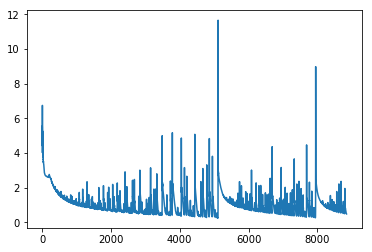

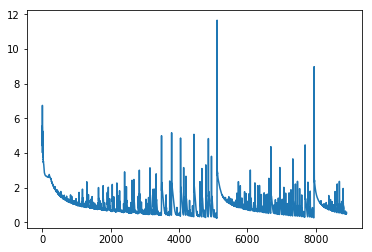

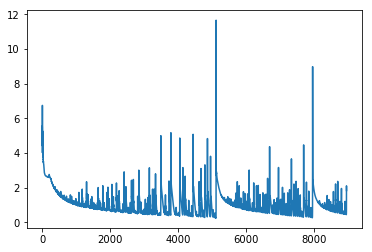

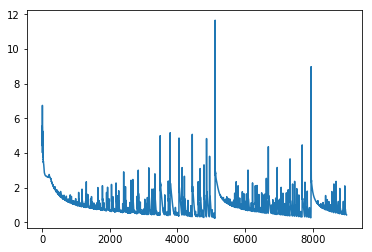

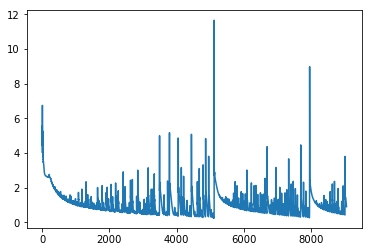

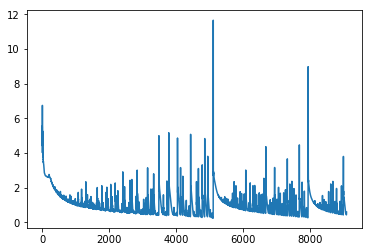

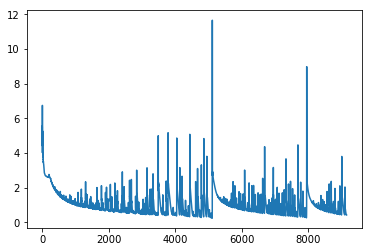

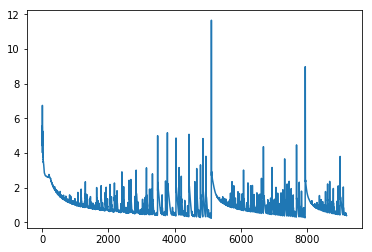

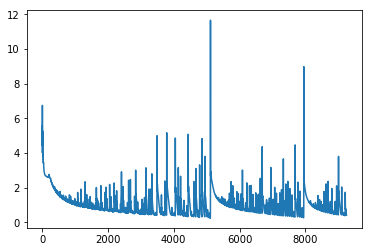

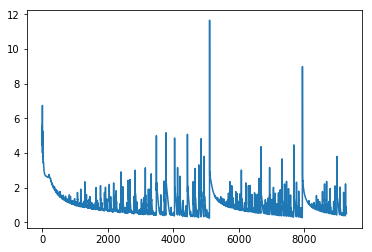

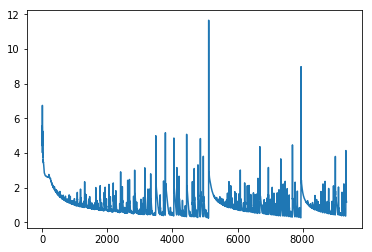

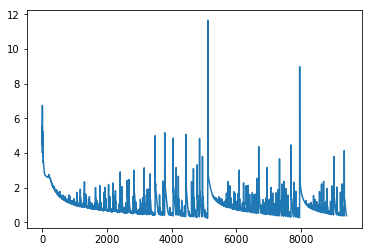

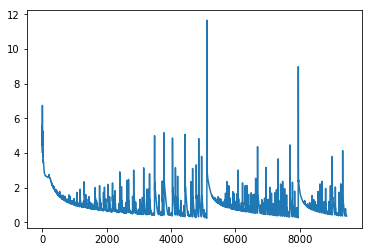

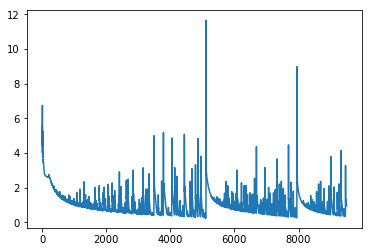

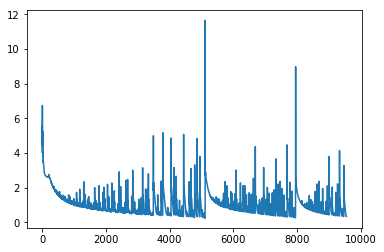

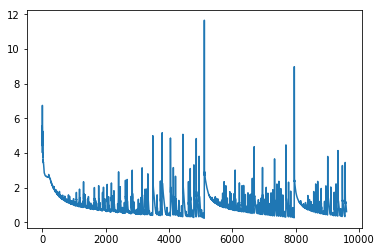

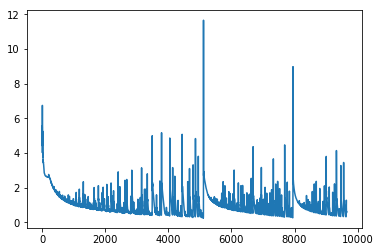

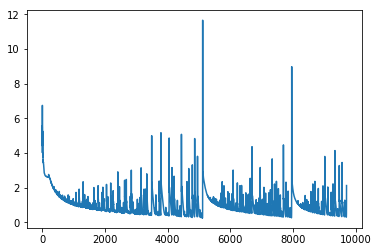

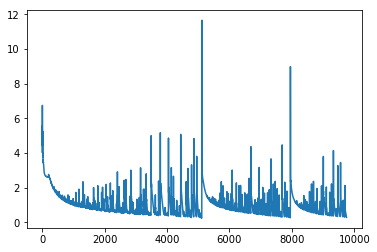

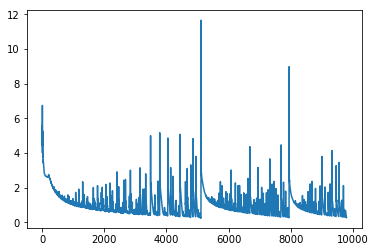

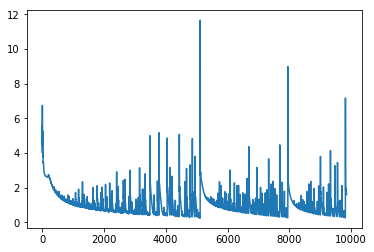

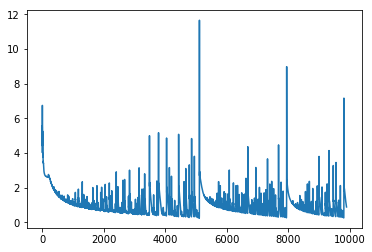

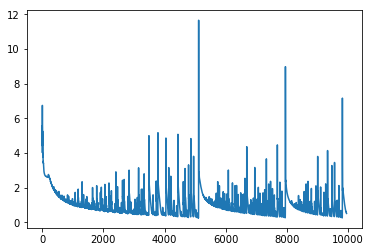

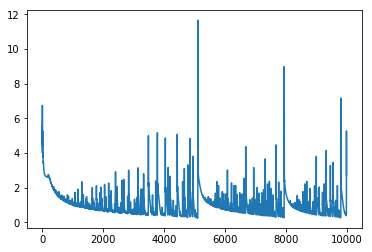

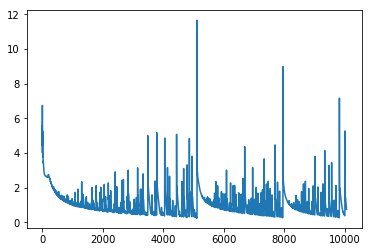

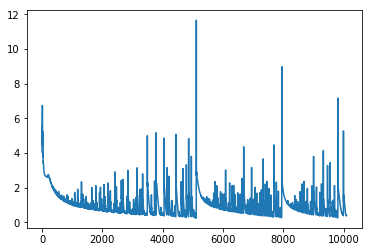

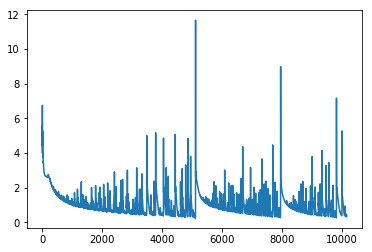

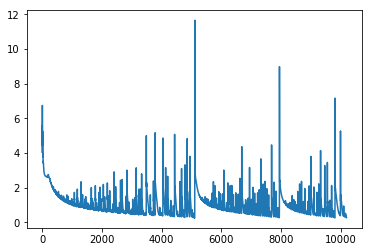

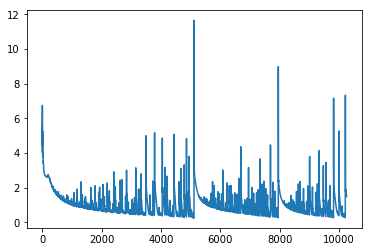

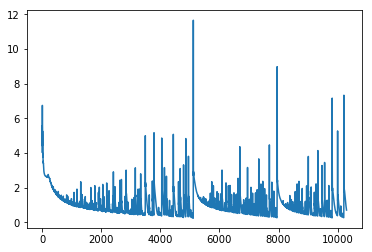

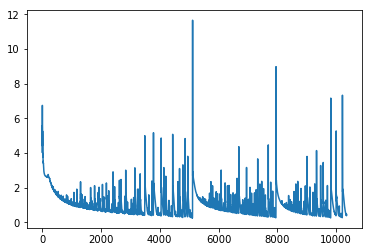

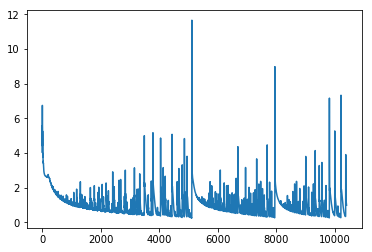

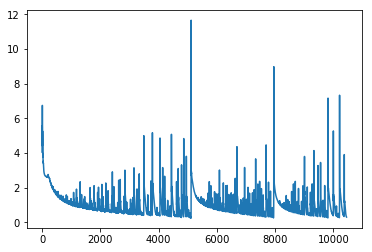

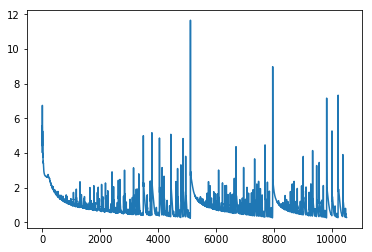

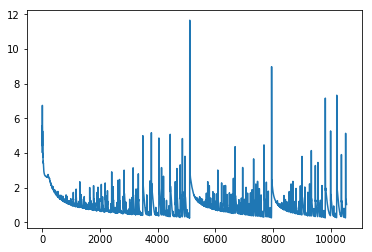

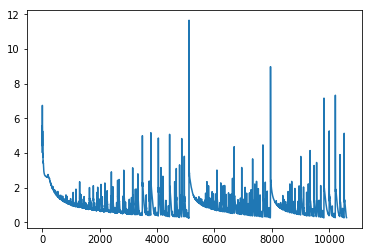

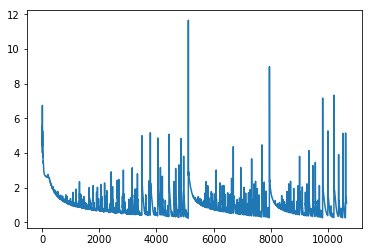

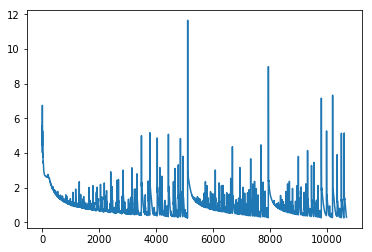

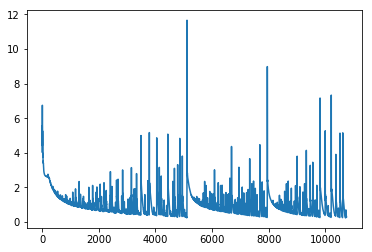

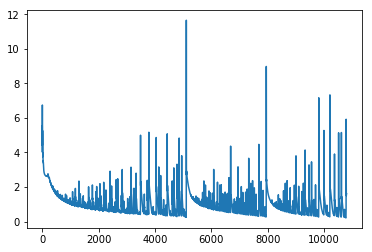

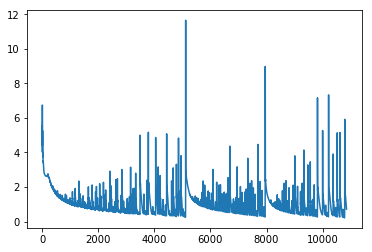

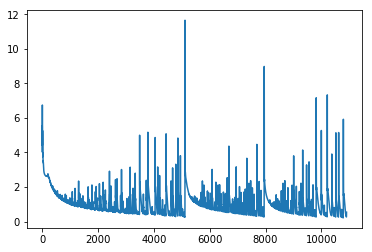

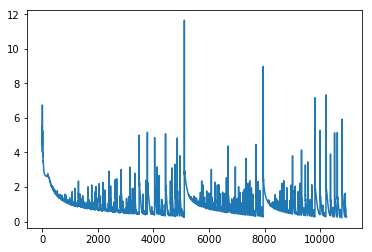

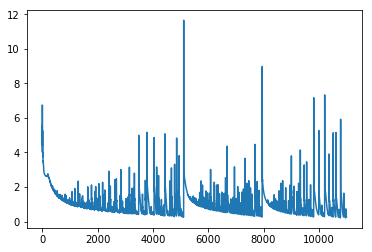

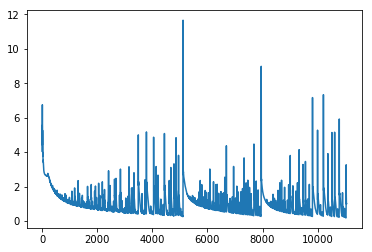

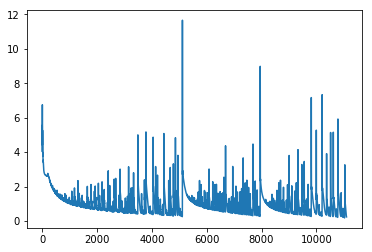

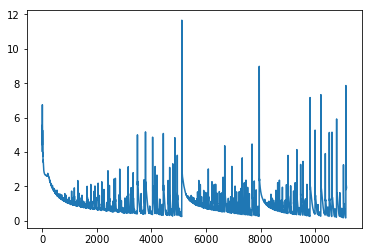

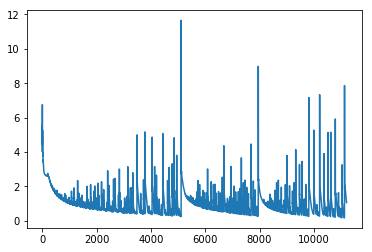

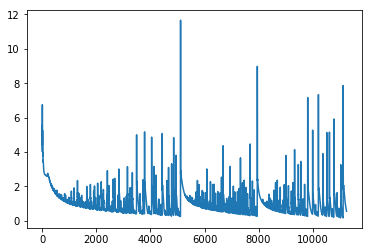

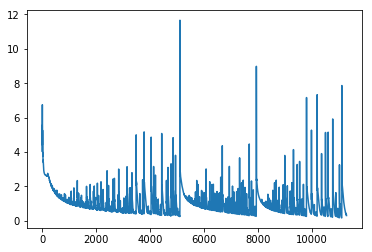

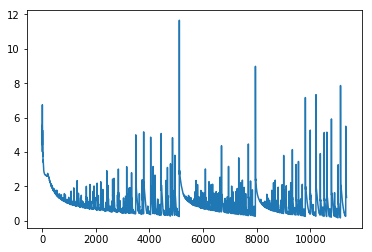

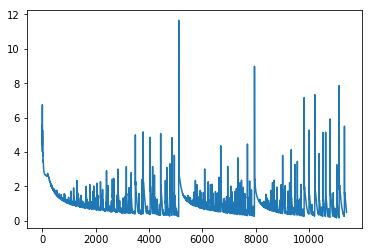

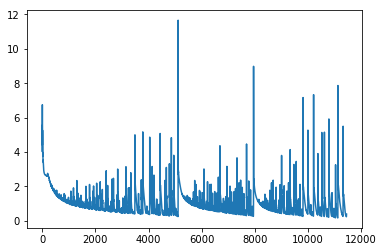

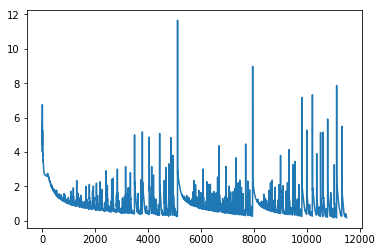

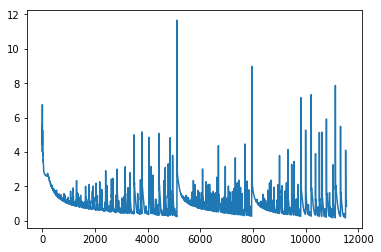

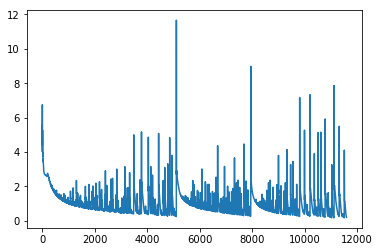

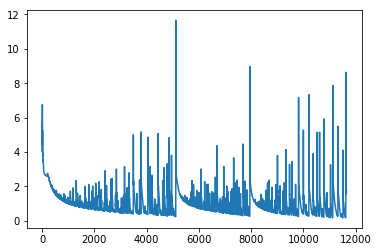

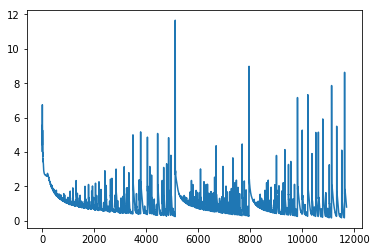

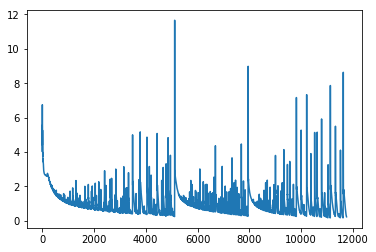

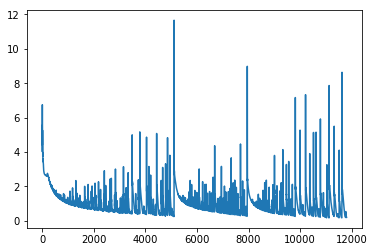

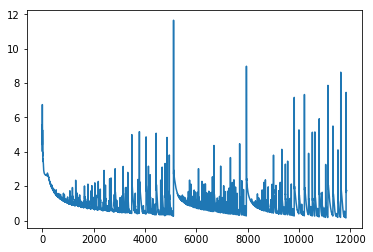

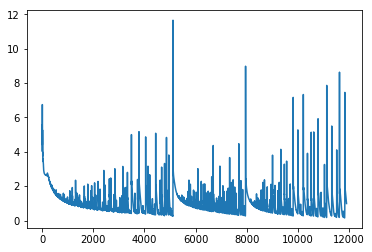

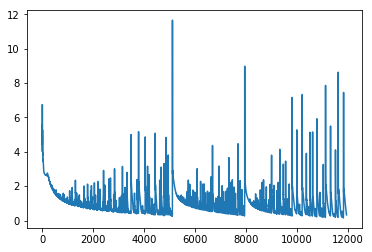

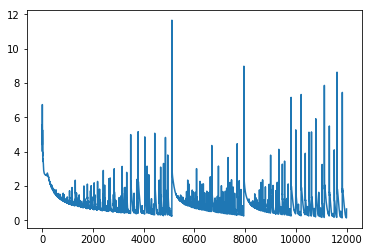

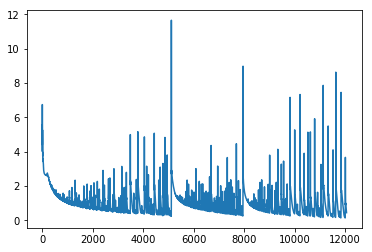

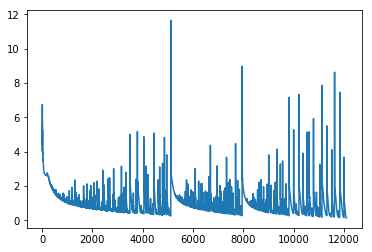

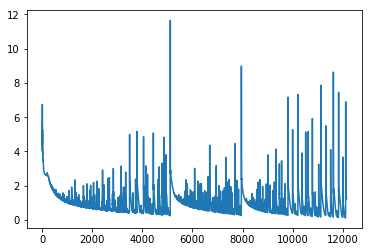

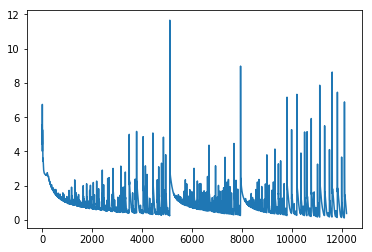

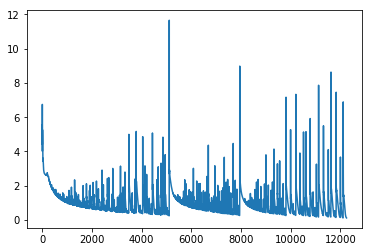

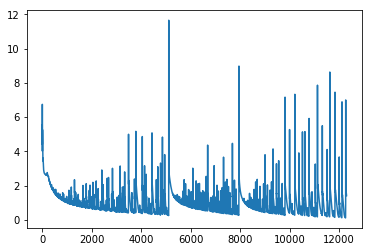

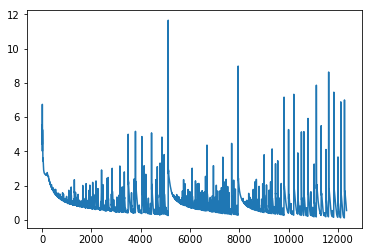

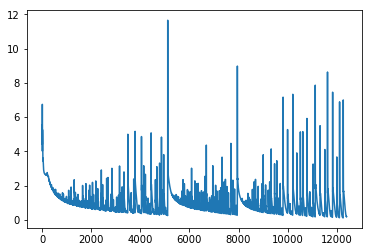

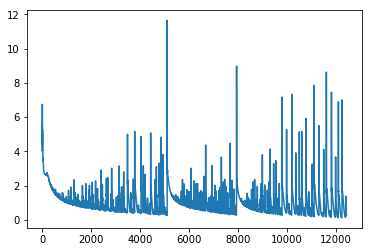

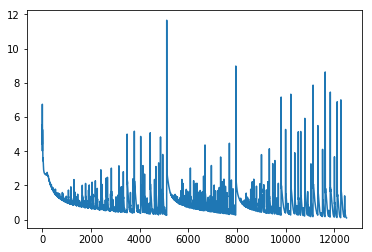

Training took 8296.97028995 seconds.


In [3]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


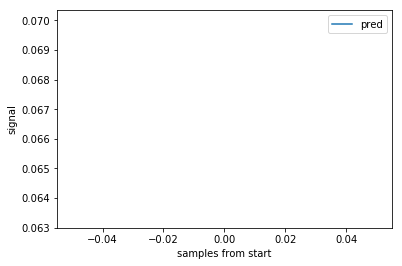

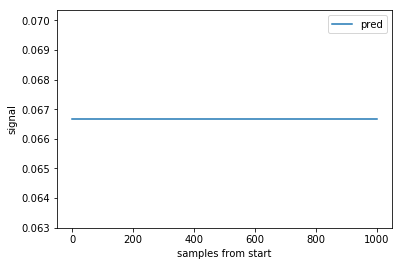

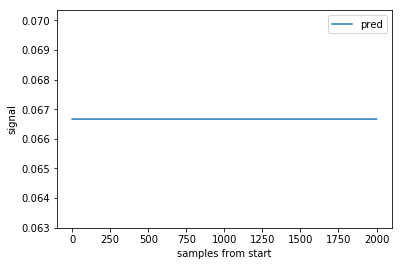

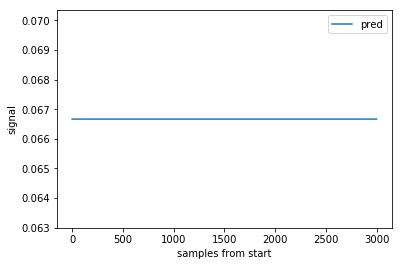

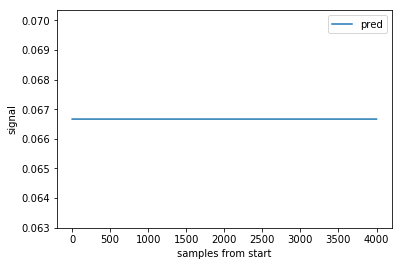

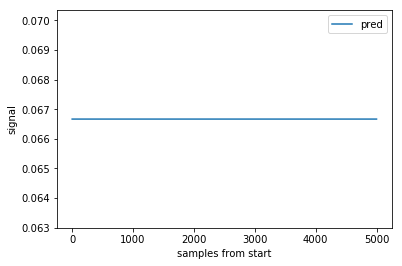

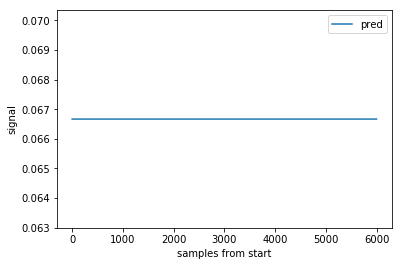

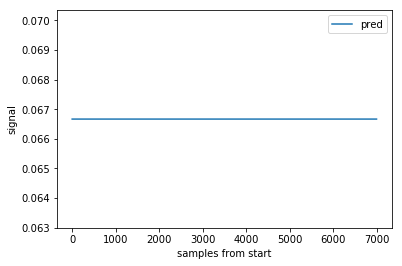

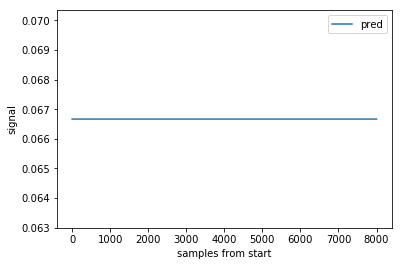

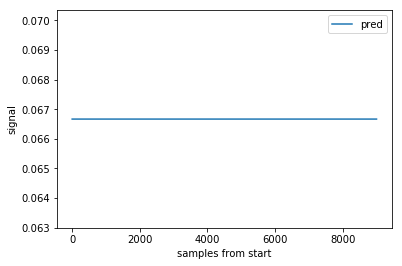

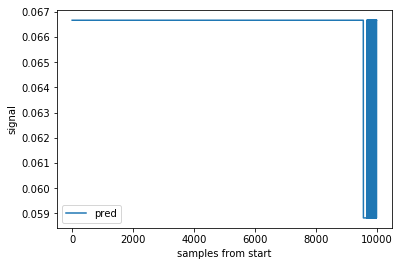

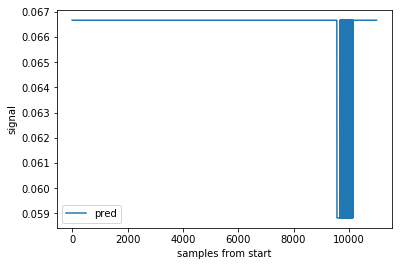

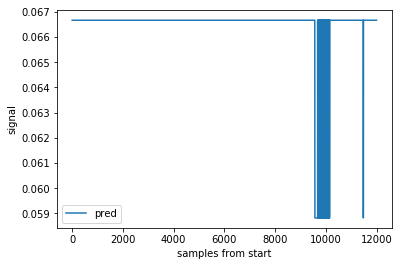

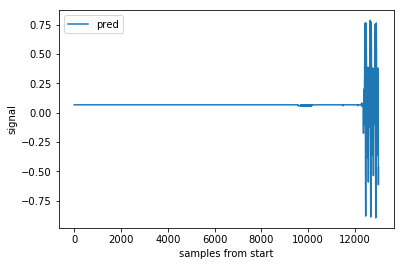

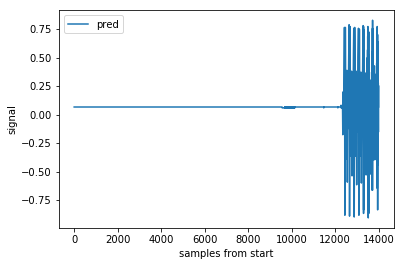

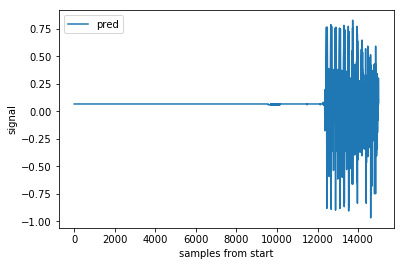

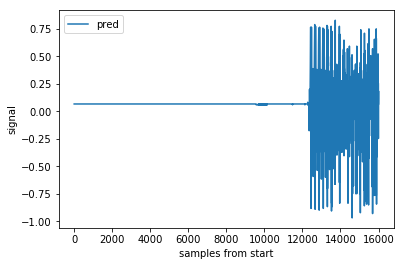

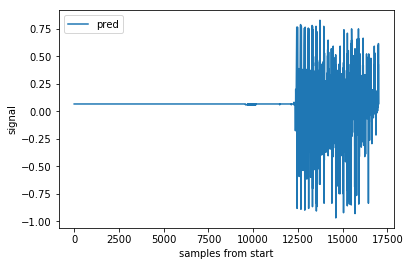

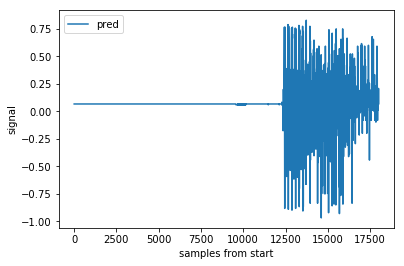

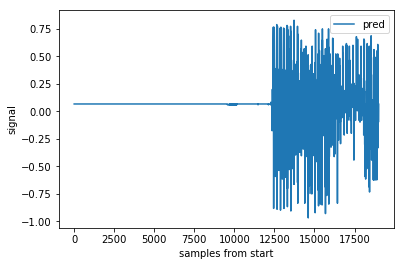

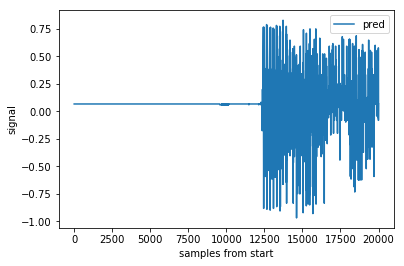

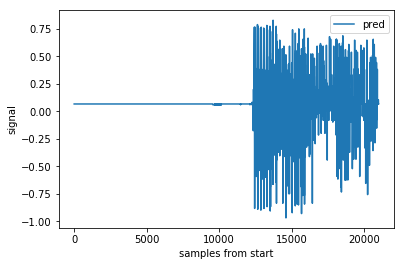

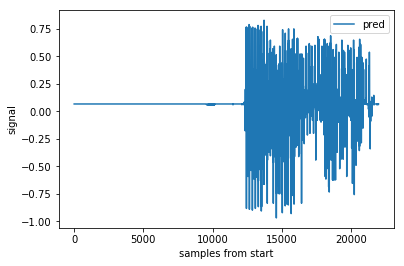

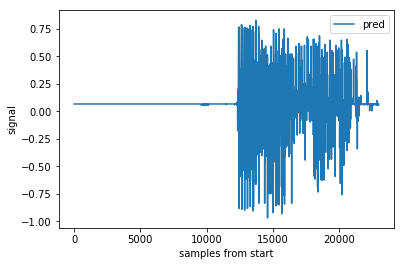

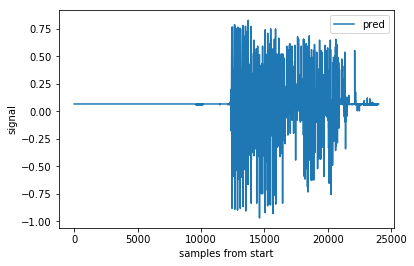

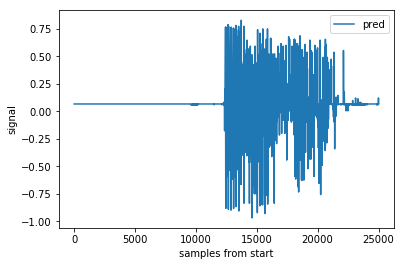

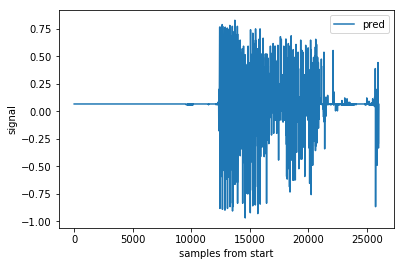

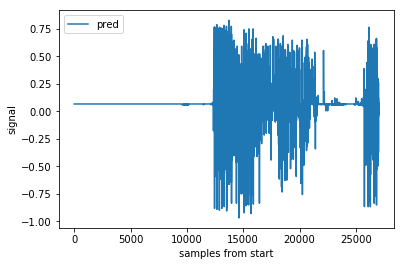

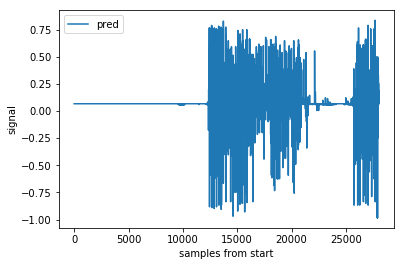

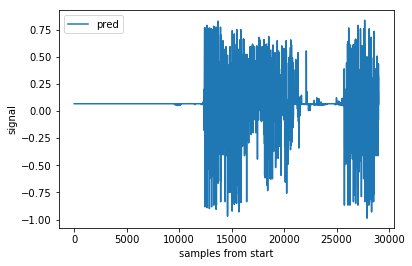

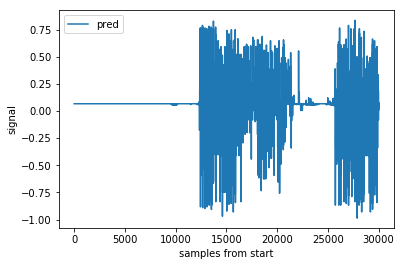

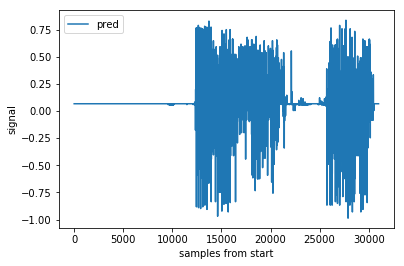

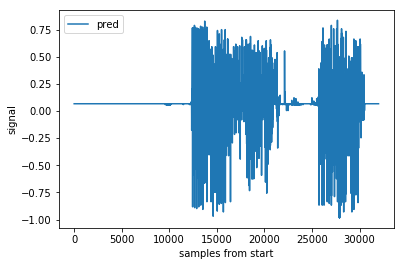

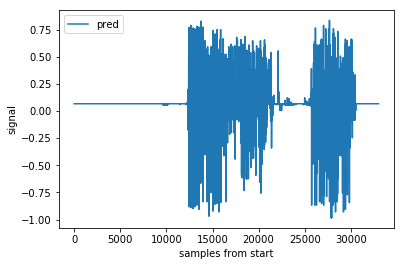

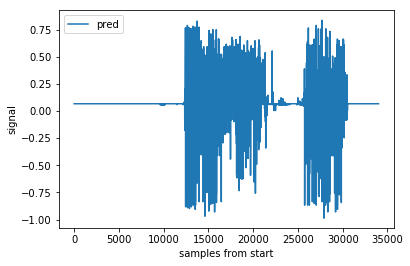

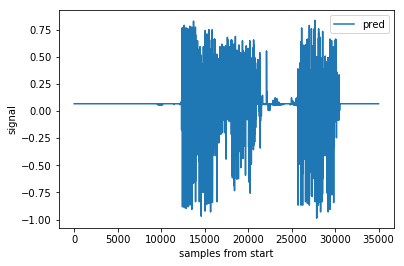

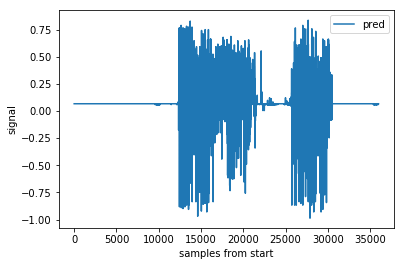

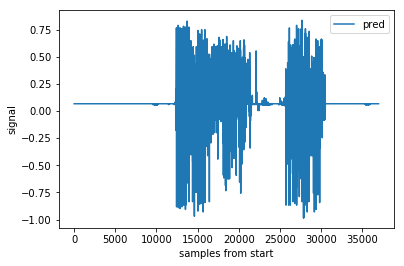

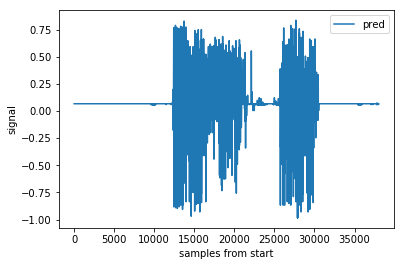

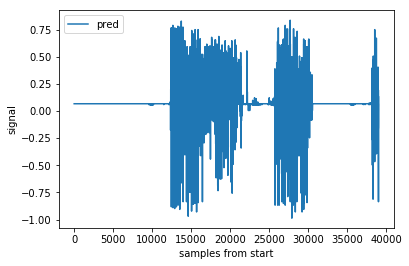

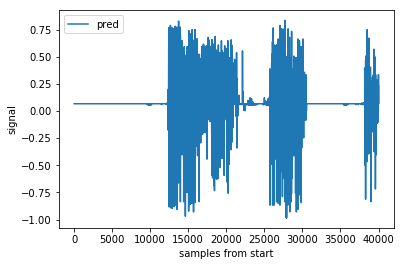

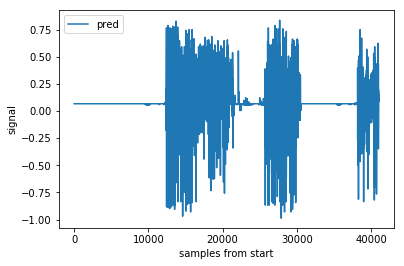

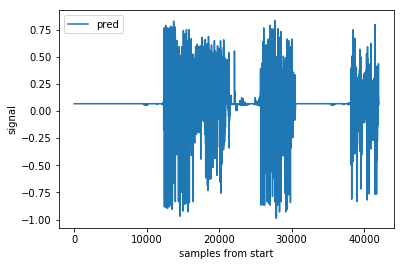

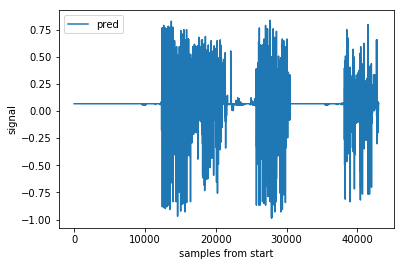

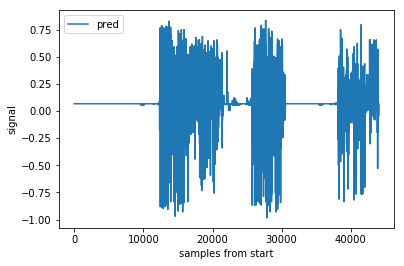

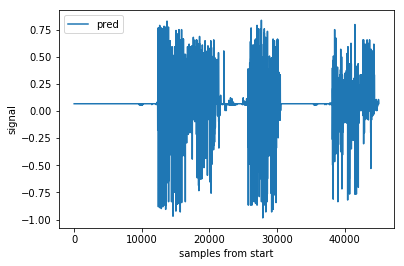

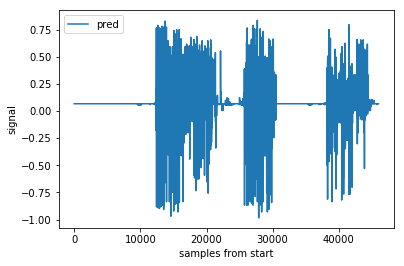

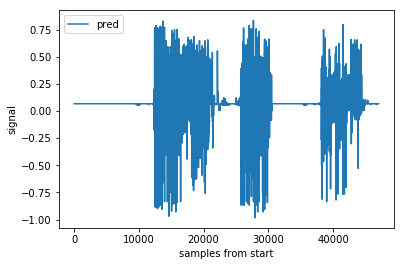

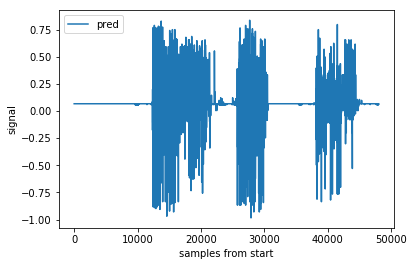

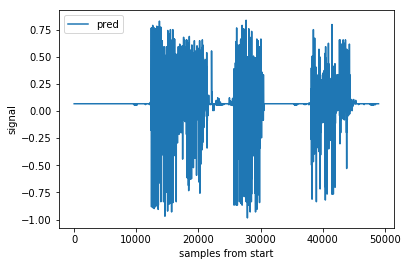

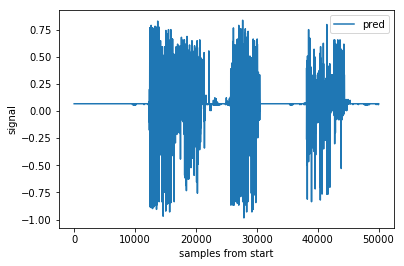

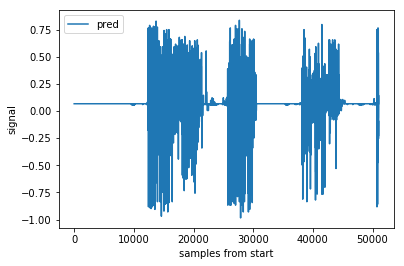

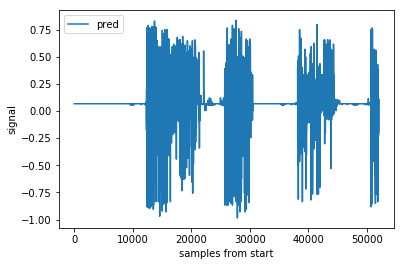

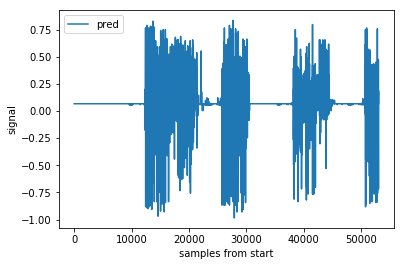

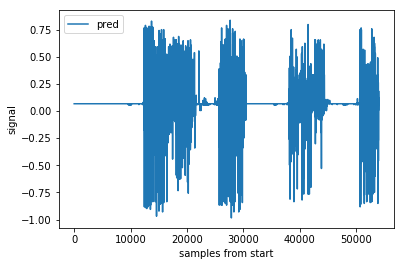

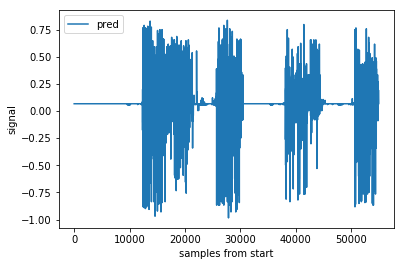

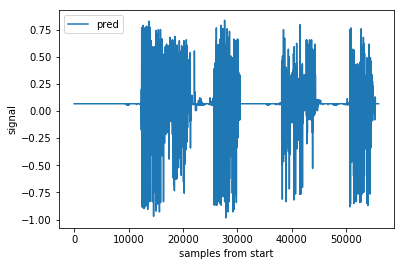

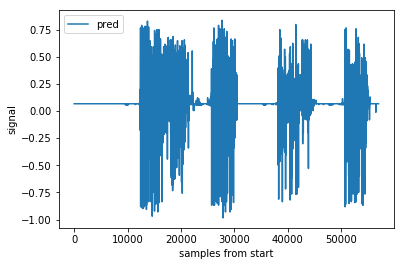

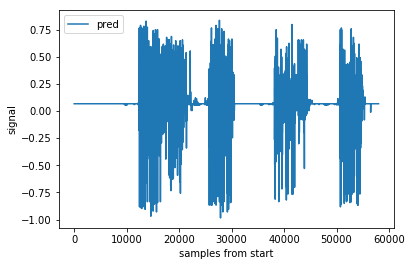

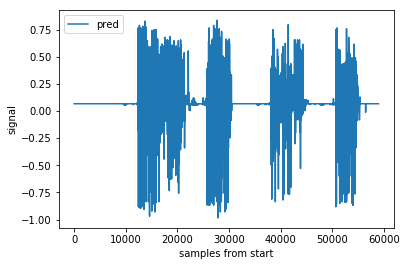

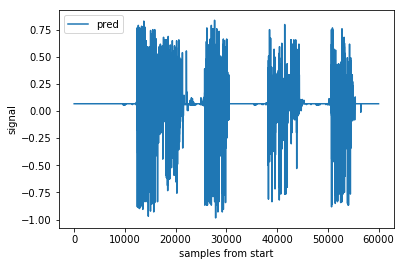

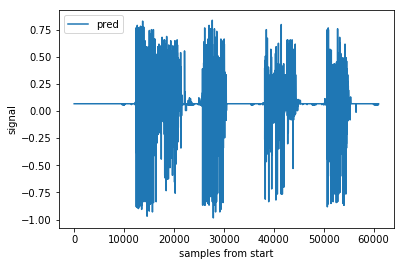

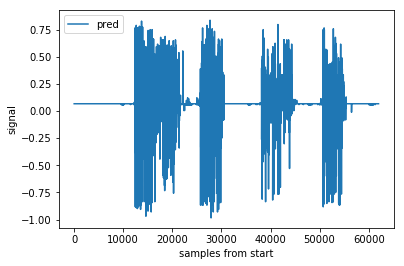

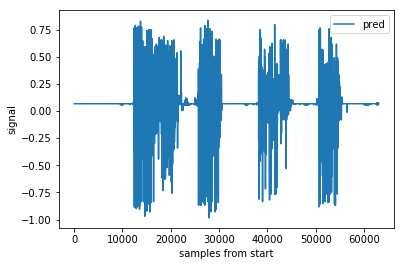

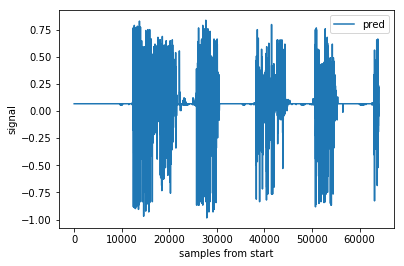

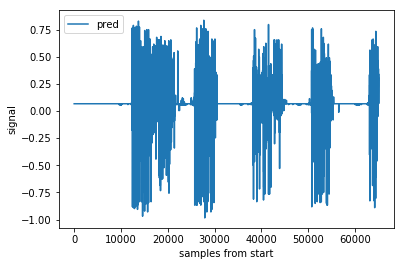

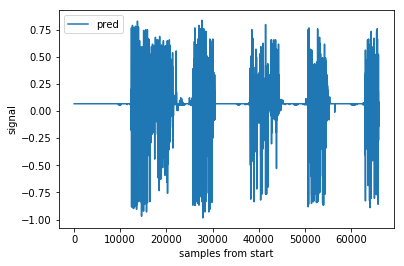

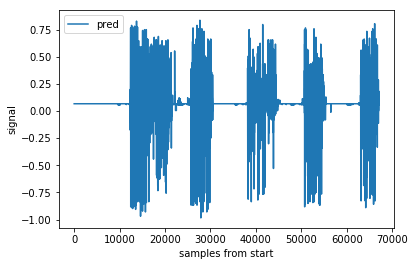

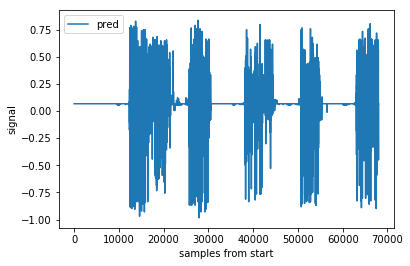

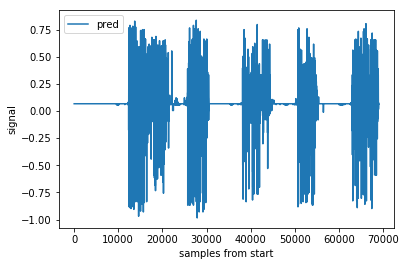

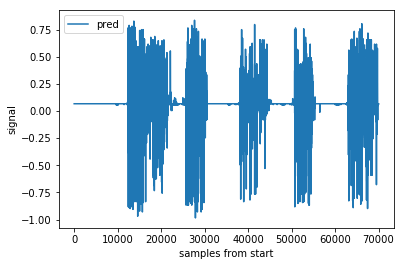

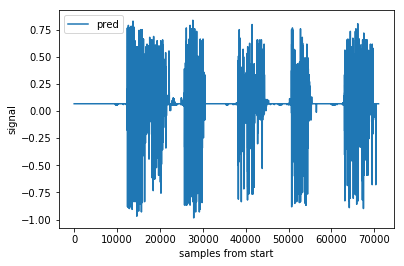

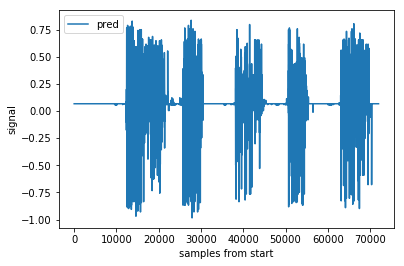

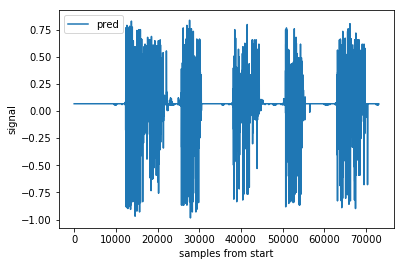

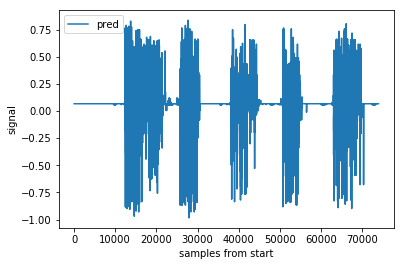

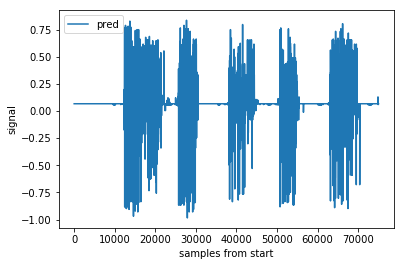

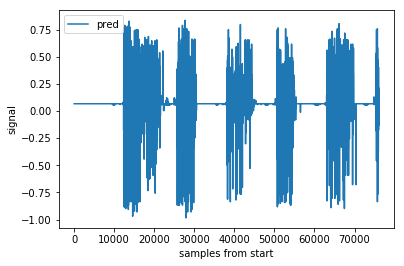

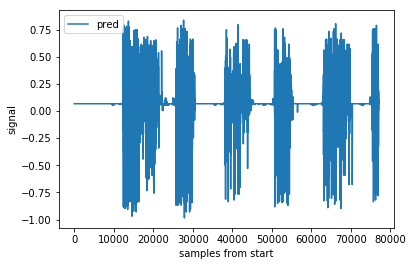

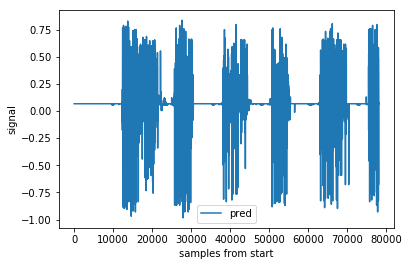

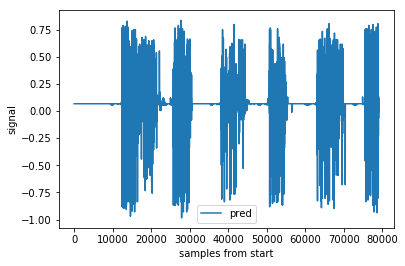

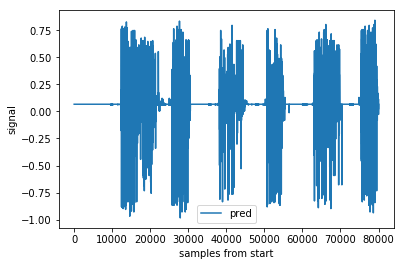

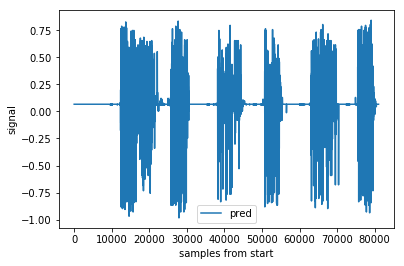

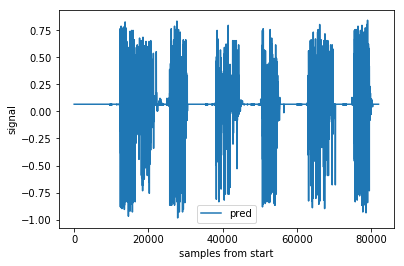

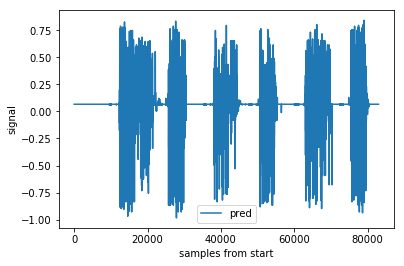

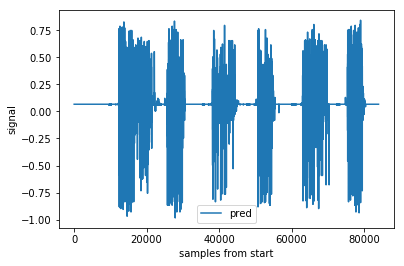

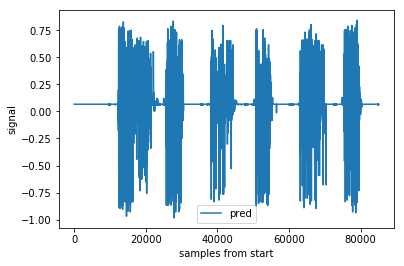

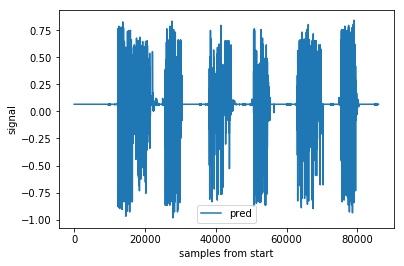

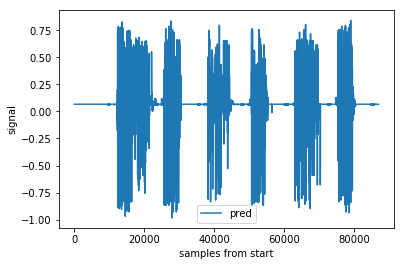

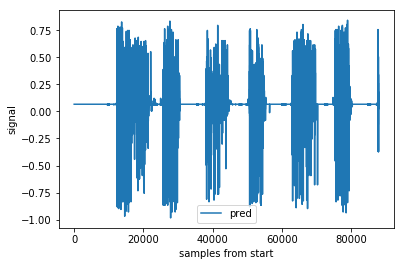

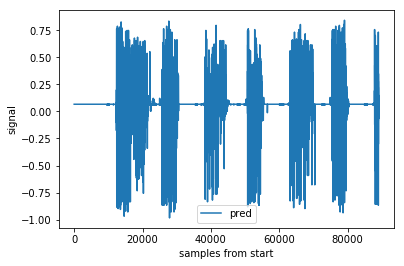

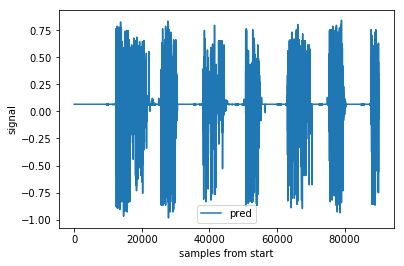

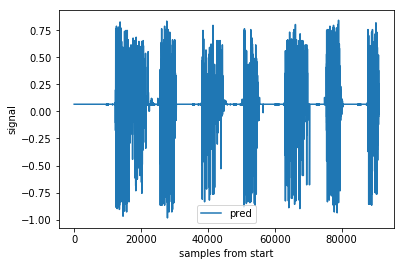

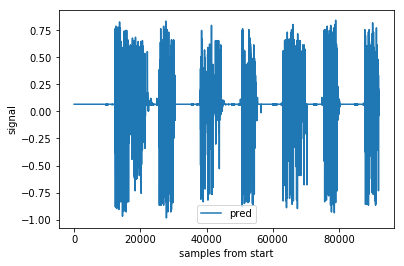

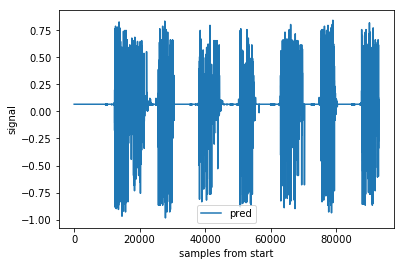

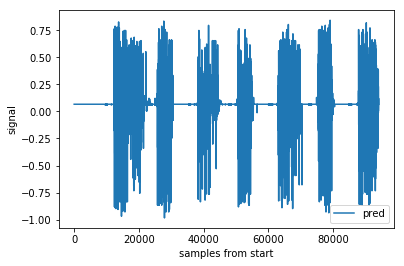

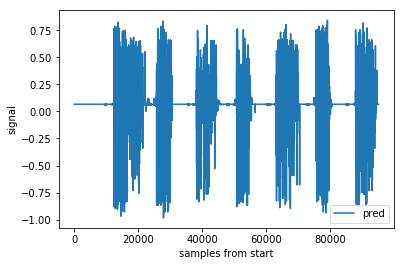

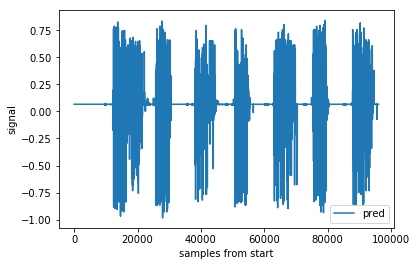

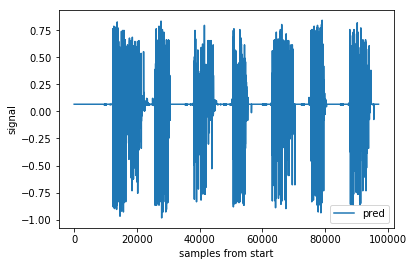

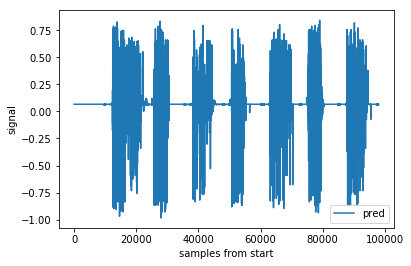

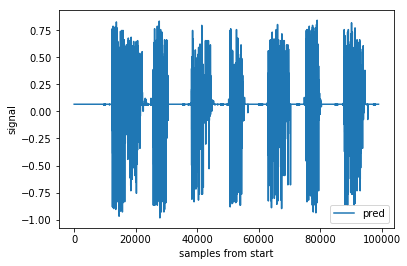

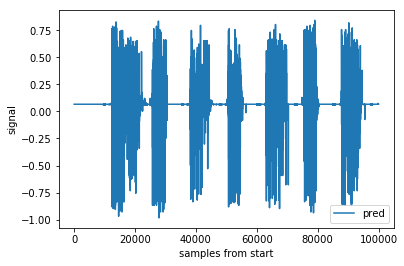

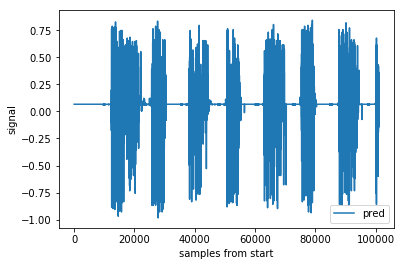

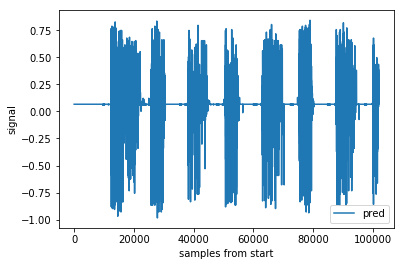

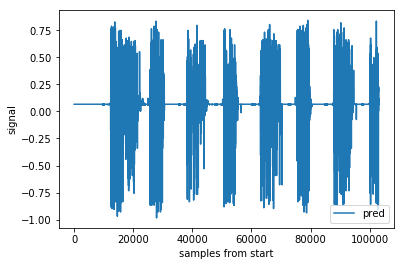

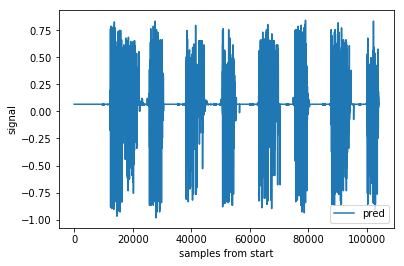

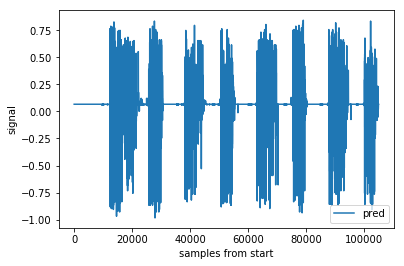

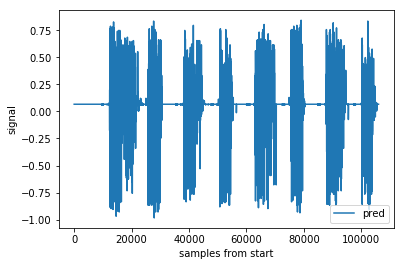

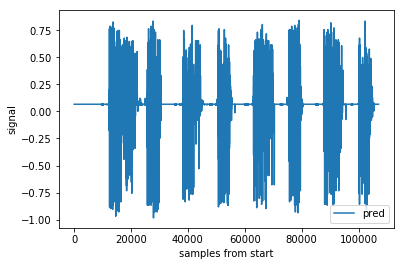

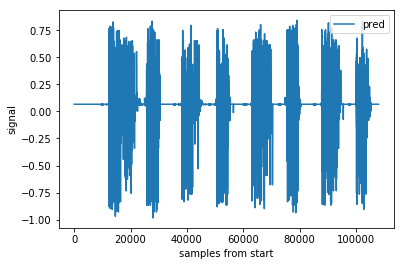

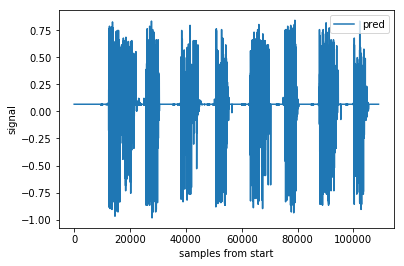

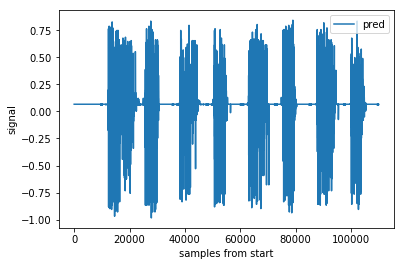

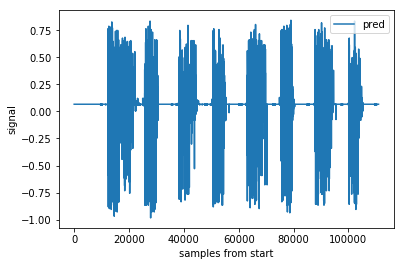

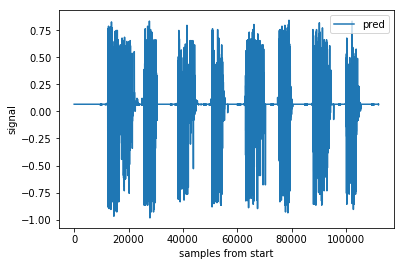

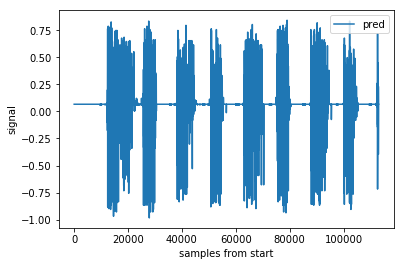

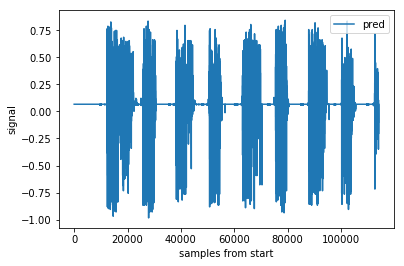

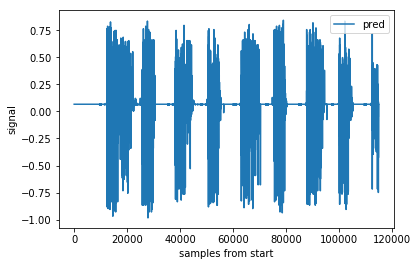

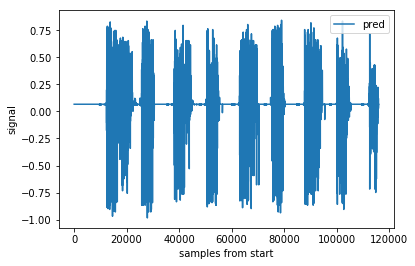

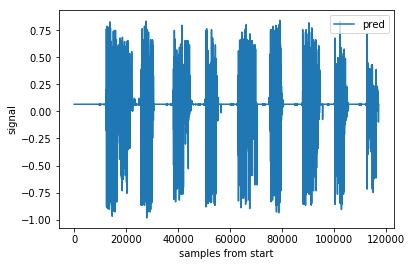

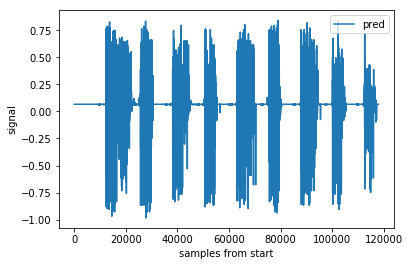

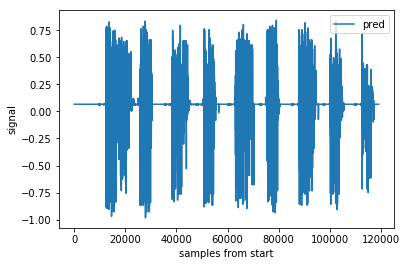

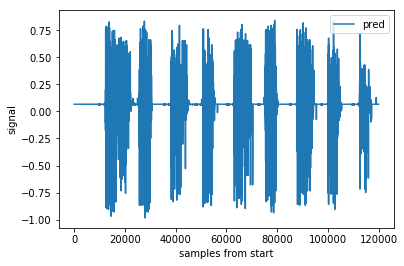

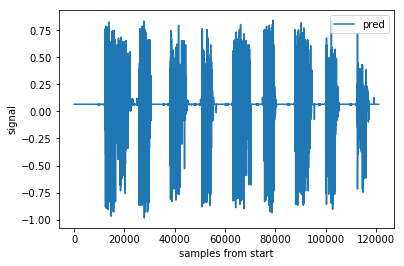

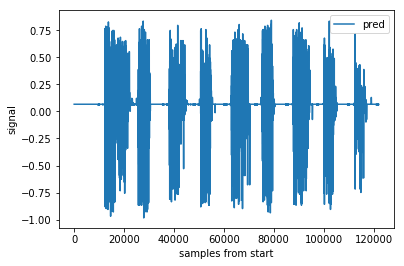

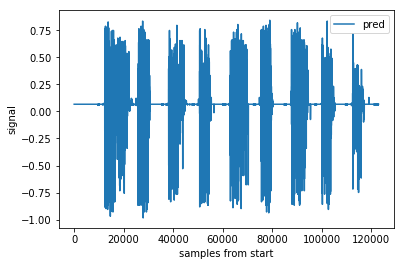

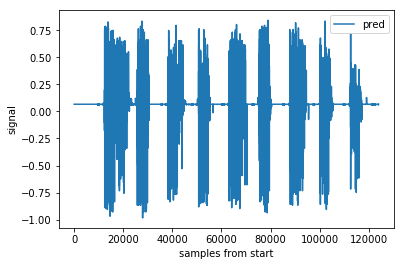

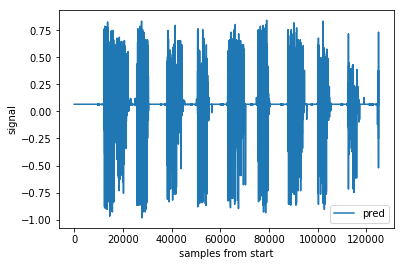

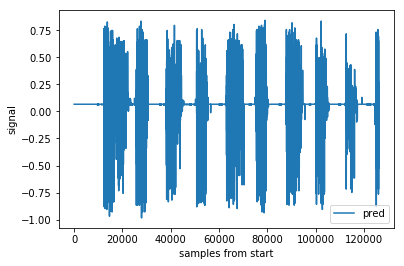

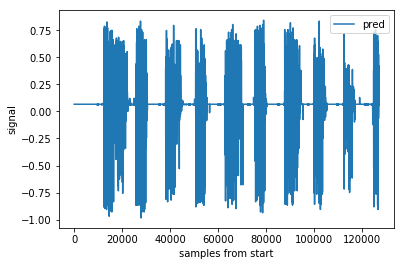

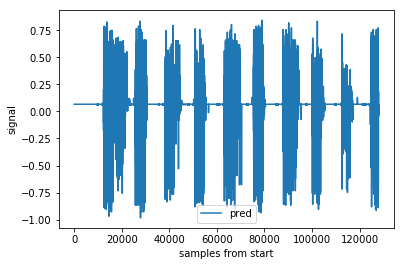

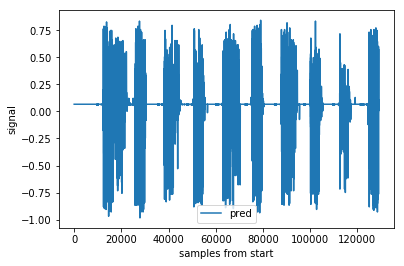

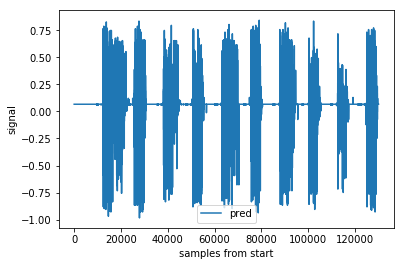

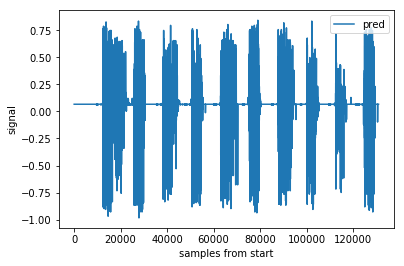

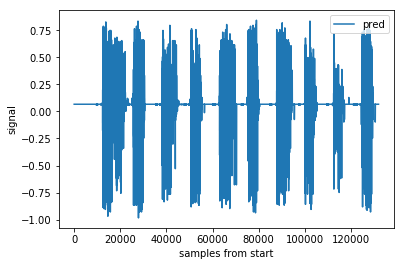

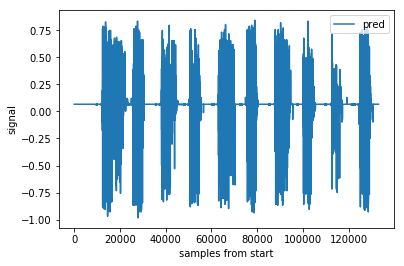

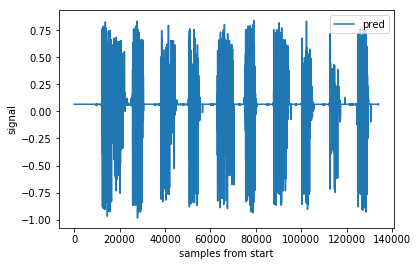

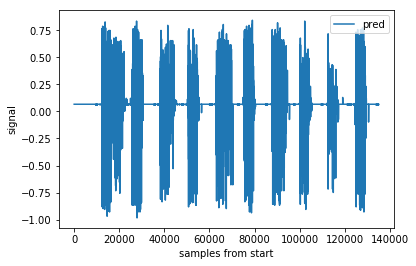

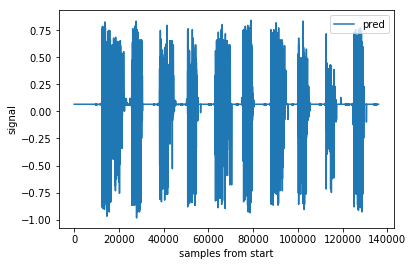

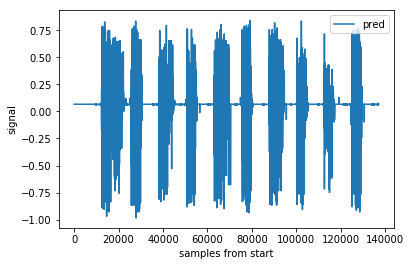

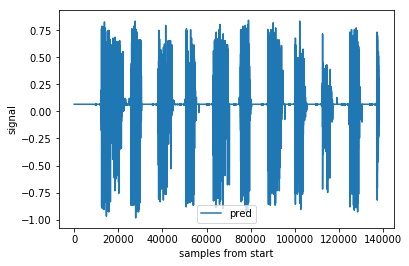

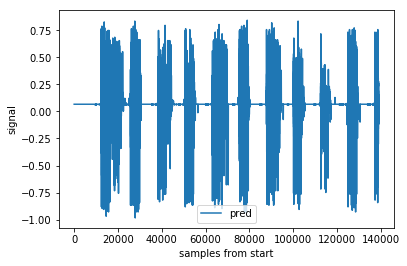

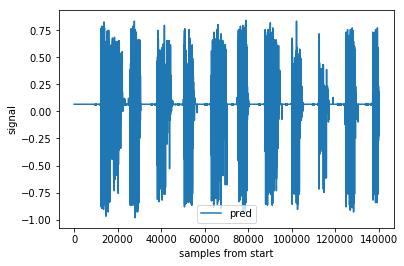

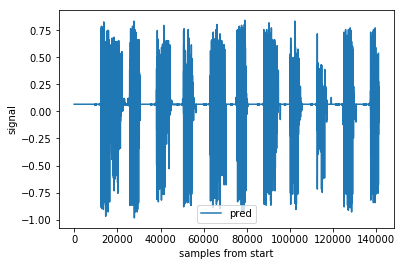

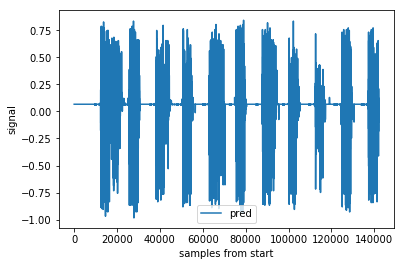

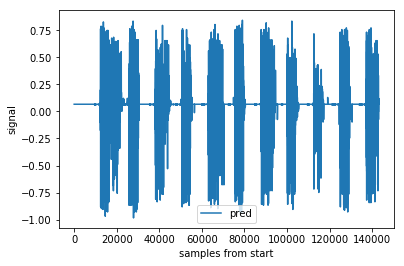

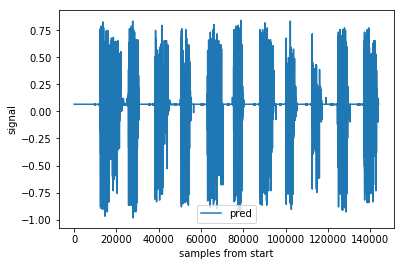

Generating took 880.126345158 seconds.


In [28]:
generator = Generator(model)

[inputs, targets] = make_batch('assets/05-aei.wav')

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 145000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [29]:
fs = 44100
Audio(predictions, rate=fs)

In [30]:
from scipy.io import wavfile as iowav
iowav.write('outputs/output.wav',fs,predictions.T) #Write the traspose (num_samples, num_channels)